# Лабораторная работа 1, Лохматов Никита Игоревич М8О-406Б-21

## 1. Выбор начальных условий

### a. Набор данных для классификации: Shelter Animal Outcomes

Датасет Shelter Animal Outcomes (https://www.kaggle.com/c/shelter-animal-outcomes/overview) содержит информацию о животных, находящихся в приютах, и их судьбах. В данной задаче классификации цель состоит в прогнозировании, будет ли животное усыновлено (adoption) или нет. Решение этой задачи поможет приютам заранее оценивать шансы на усыновление, что позволит улучшить процесс управления, разработать персонализированные стратегии для животных с низкой вероятностью усыновления и повысить общий уровень успешных пристройств.

Набор содержит категориальные (вид животного, пол, цвет) и числовые (возраст) признаки, что делает его подходящим для изучения методов обработки различных типов данных.

### b. Датасет для задачи регрессии: King County House Sales

Для задачи регрессии лучше подойдёт датасет King County House Sales (https://www.kaggle.com/harlfoxem/housesalesprediction), содержащий данные о продажах недвижимости в округе Кинг, штат Вашингтон, США. Датасет включает такие параметры, как цена недвижимости, количество комнат, площадь дома и участка, год постройки, местоположение и другие характеристики.

Цель регрессии — предсказать цену дома на основе его характеристик.

Этот анализ поможет:
- Владельцам недвижимости правильно оценить стоимость своего дома перед продажей.
- Покупателям понять, какие характеристики влияют на стоимость жилья.
- Агентствам недвижимости изучить рыночные тренды и улучшить свои прогнозы.
- Датасет содержит как числовые (площадь, количество комнат), так и категориальные (местоположение, класс дома) признаки, что позволяет изучать различные подходы к предобработке данных и построению моделей.



***Оба датасета "урезаны" до 10000 строк данных***

### c. Выбор метрик качества и обоснование

**Для классификации (Shelter Animal Outcomes):**

1. Accuracy (доля правильно классифицированных объектов):

- Используется как базовая метрика для оценки общей точности модели.
- Обоснование: учитывая многоклассовую классификацию, accuracy_knn дает общее представление о правильности предсказаний.

2. Recall (полнота):

- Показывает, какая доля объектов каждого класса была корректно предсказана.
- Обоснование: Важно для задач, где критично распознать как можно больше объектов определенного класса (например, предотвратить эвтаназию животных).

3. Precision (точность):

- Показывает, какая доля объектов, отнесенных моделью к определенному классу, действительно принадлежит этому классу.
- Обоснование: важно для минимизации ложных положительных результатов (например, неверная классификация животных как adoptable).

4. F1-score (взвешенное среднее Precision и Recall):

- Учитывает баланс между полнотой (Recall) и точностью (Precision).
- Обоснование: в данном случае важно минимизировать ошибки в редких классах (например, euthanasia), так как это может иметь серьезные последствия.

5. Confusion Matrix:

- Визуализирует, какие классы путаются моделью.
- Обоснование: позволяет детально анализировать производительность модели по каждому классу.

**Для регрессии (King County House Sales):**

1. Mean Absolute Error (MAE):

- Вычисляет среднюю абсолютную ошибку предсказания.
- Обоснование: простая и интерпретируемая метрика, показывает, насколько в среднем модель ошибается в предсказаниях.

2. Root Mean Squared Error (RMSE):

- Среднеквадратичная ошибка.
- Обоснование: штрафует большие отклонения сильнее, чем MAE, что важно, если существенные ошибки имеют больший вес.

3. R² Score (коэффициент детерминации):

- Показывает долю дисперсии зависимой переменной, объясненную моделью.
- Обоснование: удобен для оценки того, насколько хорошо модель объясняет данные.

## 2. Создание бейзлайна и оценка качества

In [1]:
dataset_shelter = './datasets/shelter_animal_outcomes.csv'
dataset_house = './datasets/kc_house_data.csv'

### a. Обучение модели из sklearn для классификации и оценка качества моделей по выбранным метрикам

Импортируем библиотеки

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, root_mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

Сделаем предобработку данных

In [3]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

Обучение модели

In [4]:
# Инициализация и обучение KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_shelter, y_train_shelter)

KNeighborsClassifier()

Оценка качества модели

Accuracy: 0.72
F1 Score: 0.66
Recall: 0.66
Precision: 0.65


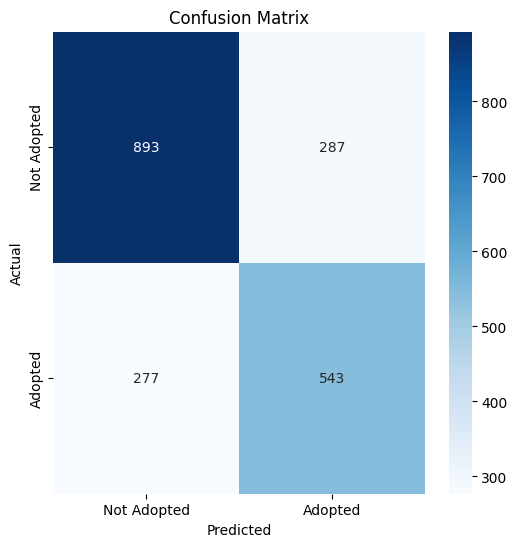

In [5]:
# Предсказание
y_pred_shelter = knn_clf.predict(X_test_shelter)

# Метрики качества
accuracy_knn = accuracy_score(y_test_shelter, y_pred_shelter)
f1_knn = f1_score(y_test_shelter, y_pred_shelter)
recall_knn = recall_score(y_test_shelter, y_pred_shelter)
precision_knn = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### b. Обучение модели из sklearn для регрессии и оценка качества моделей по выбранным метрикам

Сделаем предобработку данных

In [6]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

Обучение модели

In [7]:
# Инициализация и обучение KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_house, y_train_house)

KNeighborsRegressor()

Оценка качества модели

In [8]:
# Предсказание
y_pred_house = knn_reg.predict(X_test_house)

# Метрики качества
mae_knn = mean_absolute_error(y_test_house, y_pred_house)
rmse_knn = root_mean_squared_error(y_test_house, y_pred_house)
r2_knn = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"R-squared (R^2): {r2_knn}")

Mean Absolute Error (MAE): 165296.0123
Root Mean Squared Error (RMSE): 273167.6121167829
R-squared (R^2): 0.4968141163704711


## 3. Улучшение бейзлайна

### a. Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)

1. Улучшение предобработки данных: масштабирование

2. Формирование новых признаков на основе комбинации существующих

3. Подбор гиперпараметров: Grid Search с кросс-валидацией для оптимизации модели

### b.1 Проверка гипотез для задачи классификации

1. Масштабирование данных

In [9]:
# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Повторное обучение модели на масштабированных данных
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики для масштабированных данных
y_pred_shelter_scaled = knn_clf.predict(X_test_shelter_scaled)

accuracy_scaled = accuracy_score(y_test_shelter, y_pred_shelter_scaled)
f1_scaled = f1_score(y_test_shelter, y_pred_shelter_scaled)
recall_scaled = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_scaled = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_scaled - accuracy_knn:.2f}")
print(f"Разница в F1 Score: {f1_scaled - f1_knn:.2f}")

Гипотеза 1: масштабирование
Accuracy: 0.67
F1 Score: 0.58
Recall: 0.55
Precision: 0.60

Сравнение с бейзлайном:
Разница в Accuracy: -0.05
Разница в F1 Score: -0.08


2. Формирование новых признаков

In [10]:
# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Обновляем обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_shelter, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_new_feature = knn_clf.predict(X_test_shelter)
accuracy_new_feature = accuracy_score(y_test_shelter, y_pred_shelter_new_feature)
f1_new_feature = f1_score(y_test_shelter, y_pred_shelter_new_feature)
recall_new_feature = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_new_feature = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Accuracy: {accuracy_new_feature:.2f}")
print(f"F1 Score: {f1_new_feature:.2f}")
print(f"Recall: {recall_new_feature:.2f}")
print(f"Precision: {precision_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy_knn:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1_knn:.2f}")

Гипотеза 2: добавление нового признака
Accuracy: 0.72
F1 Score: 0.65
Recall: 0.55
Precision: 0.60

Сравнение с бейзлайном:
Разница в Accuracy: 0.01
Разница в F1 Score: -0.01


3. Подбор гиперпараметров

In [11]:
# Масштабирование данных
scaler = StandardScaler()
X_train_shelter = scaler.fit_transform(X_train_house)
X_test_shelter = scaler.transform(X_test_house)

# Определяем сетку гиперпараметров
param_grid = {
    'n_neighbors': range(1, 5),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_shelter_scaled, y_train_shelter)

# Лучшие параметры и их оценка
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_best = best_knn.predict(X_test_shelter_scaled)

accuracy_best = accuracy_score(y_test_shelter, y_pred_best)
f1_best = f1_score(y_test_shelter, y_pred_best)
recall_best = recall_score(y_test_shelter, y_pred_best)
precision_best = precision_score(y_test_shelter, y_pred_best)

print("Гипотеза 3: подбор гиперпараметров")
print(f"Accuracy: {f1_best:.2f}")
print(f"F1 Score: {accuracy_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy_knn:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1_knn:.2f}")


Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Лучшая кросс-валидация: 0.68

Гипотеза 3: подбор гиперпараметров
Accuracy: 0.52
F1 Score: 0.68
Recall: 0.43
Precision: 0.67

Сравнение с бейзлайном:
Разница в Accuracy: 0.01
Разница в F1 Score: -0.01


### b.2 Проверка гипотез для задачи регрессии

1. Масштабирование данных

In [12]:
# Масштабирование данных
scaler = StandardScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_scaled = knn_reg.predict(X_test_house_scaled)
mae_scaled = mean_absolute_error(y_test_house, y_pred_house_scaled)
rmse_scaled = root_mean_squared_error(y_test_house, y_pred_house_scaled)
r2_scaled = r2_score(y_test_house, y_pred_house_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.2f}")
print(f"R-squared (R^2): {r2_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_scaled - mae_knn:.2f}")
print(f"Разница в RMSE: {rmse_scaled - rmse_knn:.2f}")
print(f"Разница в R^2: {r2_scaled - r2_knn:.2f}")

Гипотеза 1: масштабирование
Mean Absolute Error (MAE): 143717.50
Root Mean Squared Error (RMSE): 228667.66
R-squared (R^2): 0.65

Сравнение с бейзлайном:
Разница в MAE: -21578.51
Разница в RMSE: -44499.95
Разница в R^2: 0.15


2. Формирование новых признаков

In [13]:
# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Обновляем данные
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_new_feature = knn_reg.predict(X_test_house_scaled)
mae_new_feature = mean_absolute_error(y_test_house, y_pred_house_new_feature)
rmse_new_feature = root_mean_squared_error(y_test_house, y_pred_house_new_feature)
r2_new_feature = r2_score(y_test_house, y_pred_house_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Mean Absolute Error (MAE): {mae_new_feature:.2f}")
print(f"Root Mean Squared  Error (RMSE): {rmse_new_feature:.2f}")
print(f"R-squared (R^2): {r2_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_new_feature - mae_knn:.2f}")
print(f"Разница в RMSE: {rmse_new_feature - rmse_knn:.2f}")
print(f"Разница в R^2: {r2_new_feature - r2_knn:.2f}")

Гипотеза 2: добавление нового признака
Mean Absolute Error (MAE): 143500.92
Root Mean Squared  Error (RMSE): 226718.80
R-squared (R^2): 0.65

Сравнение с бейзлайном:
Разница в MAE: -21795.10
Разница в RMSE: -46448.81
Разница в R^2: 0.16


3. Подбор гиперпараметров

In [14]:
# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

# Подбор гиперпараметров
param_grid = {
    'n_neighbors': range(1, 5),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train_house, y_train_house)

print("Лучшие параметры: ", grid_search.best_params_)
print("Лучшая кросс-валидация: ", grid_search.best_score_)
print()

# Лучшие параметры и метрики
best_reg = grid_search.best_estimator_
y_pred_house_gs = best_reg.predict(X_test_house)
mae_gs = mean_absolute_error(y_test_house, y_pred_house_gs)
rmse_gs = root_mean_squared_error(y_test_house, y_pred_house_gs)
r2_gs = r2_score(y_test_house, y_pred_house_gs)

print("Гипотеза 3: подбор гиперпараметров")
print(f"Mean Absolute Error (MAE): {mae_gs:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gs:.2f}")
print(f"R-squared (R^2): {r2_gs:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_gs - mae_knn:.2f}")
print(f"Разница в RMSE: {rmse_gs - rmse_knn:.2f}")
print(f"Разница в R^2: {r2_gs - r2_knn:.2f}")

Лучшие параметры:  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Лучшая кросс-валидация:  0.625346521443282

Гипотеза 3: подбор гиперпараметров
Mean Absolute Error (MAE): 146197.72
Root Mean Squared Error (RMSE): 228433.36
R-squared (R^2): 0.65

Сравнение с бейзлайном:
Разница в MAE: -19098.29
Разница в RMSE: -44734.25
Разница в R^2: 0.15


### c. Формирование улучшенного бейзлайна

В улучшенном бейзлайне для классификации добавим масштабирование, параметры: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

В улучшенном бейзлайне для регрессии добавим масштабирование, параметры: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Классификация

In [15]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = StandardScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

knn_clf = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights='uniform')

Регрессия

In [16]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

knn_reg = KNeighborsRegressor(n_neighbors=4, metric='manhattan', weights='distance')

d. Обучение модели с улучшенным бейзлайном 

Классификация

In [17]:
knn_clf.fit(X_train_shelter, y_train_shelter)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

Регрессия

In [18]:
knn_reg.fit(X_train_house, y_train_house)

KNeighborsRegressor(metric='manhattan', n_neighbors=4, weights='distance')

e. Оценка качества моделей с улучшенным бейзлайном 

Классификация

In [19]:
# Предсказание
y_pred_shelter_best = knn_clf.predict(X_test_shelter)

# Метрики качества
accuracy_best_knn = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_best_knn = f1_score(y_test_shelter, y_pred_shelter_best)
recall_best_knn = recall_score(y_test_shelter, y_pred_shelter_best)
precision_best_knn = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy_best: {accuracy_best_knn:.2f}")
print(f"F1 Score: {f1_best_knn:.2f}")
print(f"Recall: {recall_best_knn:.2f}")
print(f"Precision: {precision_best_knn:.2f}")

Accuracy_best: 0.68
F1 Score: 0.52
Recall: 0.43
Precision: 0.67


Регрессия

In [20]:
# Предсказание
y_pred_house_best = knn_reg.predict(X_test_house)

# Метрики качества
mae_best_knn = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_best_knn = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_best_knn = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_best_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_knn}")
print(f"R-squared (R^2): {r2_best_knn}")

Mean Absolute Error (MAE): 145297.8868512475
Root Mean Squared Error (RMSE): 230201.77758020646
R-squared (R^2): 0.6426552697072705


### f. Сравнение результатов первоначального бейзлайна с улучшенным бейзлайном

Классификация

In [21]:
print(f"Разница в accuracy: {accuracy_best_knn - accuracy_knn}")
print(f"Разница в F1 Score: {f1_best_knn - f1_knn}")

Разница в accuracy: -0.040999999999999925
Разница в F1 Score: -0.13883658008658006


Регрессия

In [22]:
print(f"Разница в MAE: {mae_best_knn - mae_knn}")
print(f"Разница в RMSE: {rmse_best_knn - rmse_knn}")
print(f"Разница в R^2: {r2_best_knn - r2_knn}")

Разница в MAE: -19998.125448752515
Разница в RMSE: -42965.83453657647
Разница в R^2: 0.14584115333679937


### g. Выводы

**Вывод по классификации:**

Внедрение улучшений не дало положительного эффекта, а, напротив, ухудшило качество модели. Вероятно, стоило лучше подбирать гиперпараметры, либо сам датасет не предназначен для решения подобной задачи

**Вывод по регрессии:**

Улучшения хорошо понизии MAE MSE, а также заметно повысили R^2

**Общие выводы:**:

1. Масштабирование улучшает точность, так как делает все признаки равнозначными
2. Оптимальная настройка гиперпараметров, таких как количество соседей, повышает качество модели, если сравнивать с настройками по умолчанию

## 4. Имплементация алгоритма машинного обучения 

### a. Самостоятельная имплементация алгоритмов машинного обучения для классификации и регрессии

Имплементация KNN для классификации

In [23]:
from scipy.spatial import distance
from collections import Counter
import numpy as np
import pandas as pd


class KNNClassifierCustom:
    def __init__(self, k=5, metric='euclidean', weights='uniform'):
        """
        Инициализация классификатора K ближайших соседей.
        
        :param k: количество соседей для голосования.
        :param metric: метрика расстояния ('euclidean', 'manhattan', и т.д.).
        :param weights: схема взвешивания ('uniform' или 'distance').
        """
        self.k = k
        self.metric = metric
        self.weights = weights

    def fit(self, X_train, y_train):
        """
        Обучение модели — сохранение обучающих данных.
        
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие метки (вектор длины N).
        """
        self.X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
        self.y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

    def predict(self, X_test):
        """
        Предсказание меток для тестовых данных.
        
        :param X_test: тестовые признаки (матрица LxM).
        :return: предсказанные метки для тестовых данных.
        """
        X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
        
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        """
        Прогноз для одного примера.
        
        :param x: тестовый пример (вектор длины M).
        :return: предсказанная метка.
        """
        # Вычисление расстояний до всех точек обучающего набора
        distances = distance.cdist(self.X_train, [x], metric=self.metric).flatten()
        
        # Определение индексов k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_distances = distances[k_indices]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Взвешивание соседей
        if self.weights == 'uniform':
            # Равномерные веса: обычное голосование
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]
        elif self.weights == 'distance':
            # Взвешивание по обратному расстоянию
            weights = 1 / (k_nearest_distances + 1e-10)  # Защита от деления на ноль
            weighted_votes = Counter()
            for label, weight in zip(k_nearest_labels, weights):
                weighted_votes[label] += weight
            
            # Возвращаем метку с наибольшим взвешенным значением
            return weighted_votes.most_common(1)[0][0]
        else:
            raise ValueError("Параметр weights должен быть 'uniform' или 'distance'.")

Имплементация KNN для регрессии

In [24]:
class KNNRegressorCustom:
    def __init__(self, k=5, metric='euclidean', weights='uniform'):
        """
        Инициализация регрессора K ближайших соседей.
        
        :param k: количество ближайших соседей.
        :param metric: метрика расстояния ('euclidean', 'manhattan', и т.д.).
        :param weights: схема взвешивания ('uniform' или 'distance').
        """
        self.k = k
        self.metric = metric
        self.weights = weights

    def fit(self, X_train, y_train):
        """
        Обучение модели — сохранение обучающих данных.
        
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие целевые значения (вектор длины N).
        """
        self.X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else np.array(X_train)
        self.y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else np.array(y_train)

    def predict(self, X_test):
        """
        Предсказание целевых значений для тестовых данных.
        
        :param X_test: тестовые признаки (матрица LxM).
        :return: массив предсказанных целевых значений.
        """
        X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else np.array(X_test)
        
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        """
        Прогноз для одного примера.
        
        :param x: тестовый пример (вектор длины M).
        :return: предсказанное значение.
        """
        # Вычисление расстояний до всех точек обучающего набора
        x = np.array(x).reshape(1, -1)
        distances = distance.cdist(self.X_train, x, metric=self.metric).flatten()

        # Определение индексов k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_distances = distances[k_indices]
        k_nearest_labels = self.y_train[k_indices]

        # Взвешивание соседей
        if self.weights == 'uniform':
            # Равномерные веса: среднее значение
            return np.mean(k_nearest_labels)
        elif self.weights == 'distance':
            # Взвешивание по обратному расстоянию
            weights = 1 / (k_nearest_distances + 1e-10)  # Защита от деления на ноль

            return np.dot(weights, k_nearest_labels) / np.sum(weights)
        else:
            raise ValueError("Параметр weights должен быть 'uniform' или 'distance'.")

### b. Обучение имплементированной модели

Классификация

In [25]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

knn_clf = KNNClassifierCustom(k=5)
knn_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [26]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

knn_reg = KNNRegressorCustom(k=5)
knn_reg.fit(X_train_house, y_train_house)

### c. Оценка качества имплементированных моделей

Классификация

Accuracy: 0.73
F1 Score: 0.67
Recall: 0.67
Precision: 0.67


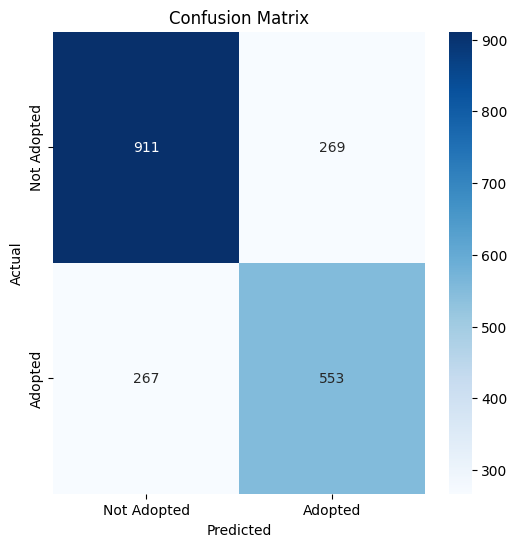

In [27]:
# Предсказание
y_pred_shelter = knn_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_knn = accuracy_score(y_test_shelter, y_pred_shelter)
f1_custom_knn = f1_score(y_test_shelter, y_pred_shelter)
recall_custom_knn = recall_score(y_test_shelter, y_pred_shelter)
precision_custom_knn = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_custom_knn:.2f}")
print(f"F1 Score: {f1_custom_knn:.2f}")
print(f"Recall: {recall_custom_knn:.2f}")
print(f"Precision: {precision_custom_knn:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [28]:
# Предсказание
y_pred_house = knn_reg.predict(X_test_house)

# Метрики качества
mae_custom_knn = mean_absolute_error(y_test_house, y_pred_house)
rmse_custom_knn = root_mean_squared_error(y_test_house, y_pred_house)
r2_custom_knn = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_custom_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_knn}")
print(f"R-squared (R^2): {r2_custom_knn}")

Mean Absolute Error (MAE): 143717.6027
Root Mean Squared Error (RMSE): 228580.43515954417
R-squared (R^2): 0.6476711983979776


### d. Сравнение результатов первоначального бейзлайна и имплементированных моделей

Классификация

In [29]:
print(f"Разница в accuracy: {accuracy_custom_knn - accuracy_knn}")
print(f"Разница в F1 Score: {f1_custom_knn - f1_knn}")

Разница в accuracy: 0.014000000000000012
Разница в F1 Score: 0.015387000332189094


Регрессия

In [30]:
print(f"Разница в MAE: {mae_custom_knn - mae_knn}")
print(f"Разница в RMSE: {rmse_custom_knn - rmse_knn}")
print(f"Разница в R^2: {r2_custom_knn - r2_knn}")

Разница в MAE: -21578.409600000014
Разница в RMSE: -44587.17695723876
Разница в R^2: 0.15085708202750647


### e. Выводы

Точность имплементированной модели для задачи классификации оказалась лучше, чем для встроенной модели

Ошибки имплементированной модели уменьшились, R^2 повысился

В целом имплементированная модель показала себя лучше, чем встроенная

### f. Добавление техник из улучшенного бейзлайна

Классификация

In [31]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = StandardScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

knn_clf = KNNClassifierCustom(k=4, metric='cityblock', weights='uniform')

Регрессия

In [32]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

knn_reg = KNNRegressorCustom(k=4, metric='cityblock', weights='distance')

### g. Обучение на улучшенном бейзлайне

Классификация

In [33]:
knn_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [34]:
knn_reg.fit(X_train_house, y_train_house)

### h. Оценка качества моделей на улучшенном бейзлайне

Классификация

Accuracy: 0.68
F1 Score: 0.60
Recall: 0.59
Precision: 0.61


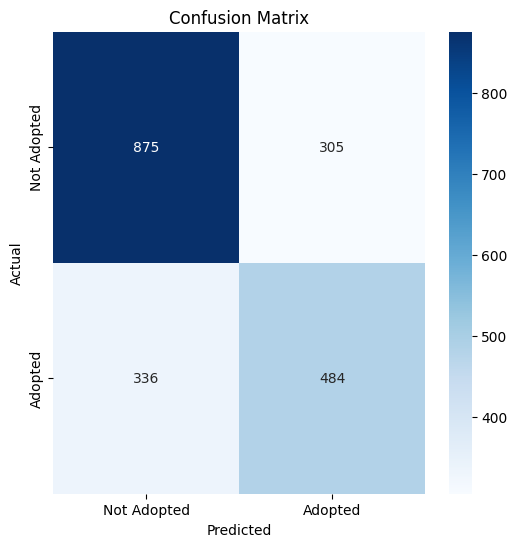

In [35]:
# Предсказание
y_pred_shelter_best = knn_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_best_knn = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_custom_best_knn = f1_score(y_test_shelter, y_pred_shelter_best)
recall_custom_best_knn = recall_score(y_test_shelter, y_pred_shelter_best)
precision_custom_best_knn = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_custom_best_knn:.2f}")
print(f"F1 Score: {f1_custom_best_knn:.2f}")
print(f"Recall: {recall_custom_best_knn:.2f}")
print(f"Precision: {precision_custom_best_knn:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter_best)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [36]:
# Предсказание
y_pred_house_best = knn_reg.predict(X_test_house)

# Метрики качества
mae_custom_best_knn = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_custom_best_knn = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_custom_best_knn = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_custom_best_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_best_knn}")
print(f"R-squared (R^2): {r2_custom_best_knn}")

Mean Absolute Error (MAE): 145279.42552212454
Root Mean Squared Error (RMSE): 230197.33648882312
R-squared (R^2): 0.6426690574834635


### i. Сравнение результатов первоначального бейзлайна с улучшенным

Классификация

In [37]:
print(f"Разница в accuracy: {accuracy_custom_best_knn - accuracy_best_knn}")
print(f"Разница в F1 Score: {f1_custom_best_knn - f1_best_knn}")

Разница в accuracy: 0.0024999999999999467
Разница в F1 Score: 0.08227067240818009


Регрессия

In [38]:
print(f"Разница в MAE: {mae_custom_best_knn - mae_best_knn}")
print(f"Разница в RMSE: {rmse_custom_best_knn - rmse_best_knn}")
print(f"Разница в R^2: {r2_custom_best_knn - r2_best_knn}")

Разница в MAE: -18.461329122947063
Разница в RMSE: -4.4410913833417
Разница в R^2: 1.3787776192986101e-05


### j. Выводы

Точность имплементированной модели с улучшениями для задачи классификации оказалась немного лучше, чем для встроенной модели

Ошибки имплементированной модели с улучшениями для задачи регрессии немного уменьшились, R^2 остался практически идентичным

# Лабораторная работа 2, Лохматов Никита Игоревич М8О-406Б-21

## 1. Выбор начальных условий в ЛР 1

## 2. Создание бейзлайна и оценка качества

### a. Обучение модели из sklearn для классификации и оценка качества моделей по выбранным метрикам

Импортируем библиотеки

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge

Сделаем предобработку данных

In [40]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

Обучение модели

In [41]:
# Инициализация и обучение логистической регрессии
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_shelter, y_train_shelter)

LogisticRegression(max_iter=500, random_state=42)

Оценка качества модели

Accuracy: 0.76
F1 Score: 0.70
Recall: 0.66
Precision: 0.73


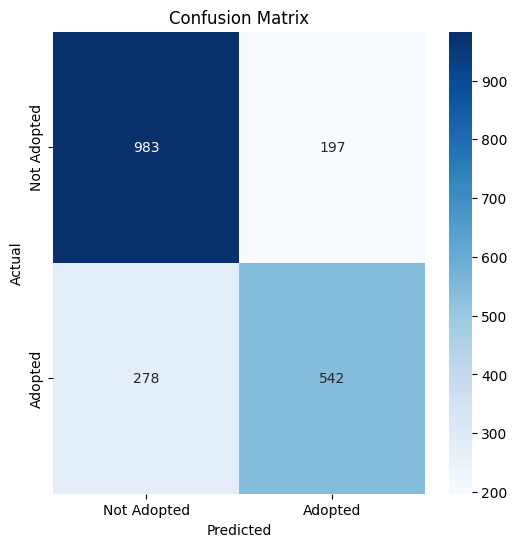

In [42]:
# Предсказание
y_pred_shelter = log_reg.predict(X_test_shelter)

# Метрики качества
accuracy_log = accuracy_score(y_test_shelter, y_pred_shelter)
f1_log = f1_score(y_test_shelter, y_pred_shelter)
recall_log = recall_score(y_test_shelter, y_pred_shelter)
precision_log = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_log:.2f}")
print(f"F1 Score: {f1_log:.2f}")
print(f"Recall: {recall_log:.2f}")
print(f"Precision: {precision_log:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### b. Обучение модели из sklearn для регрессии и оценка качества моделей по выбранным метрикам

Сделаем предобработку данных

In [43]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

Обучение модели

In [44]:
# Инициализация и обучение линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train_house, y_train_house)

LinearRegression()

Оценка качества модели

In [45]:
# Предсказание
y_pred_house = lin_reg.predict(X_test_house)

# Метрики качества
mae_lin = mean_absolute_error(y_test_house, y_pred_house)
rmse_lin = root_mean_squared_error(y_test_house, y_pred_house)
r2_lin = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_lin:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lin:.2f}")
print(f"R^2 Score: {r2_lin:.2f}")

Mean Absolute Error (MAE): 142010.83
Root Mean Squared Error (RMSE): 226649.05
R^2 Score: 0.65


## 3. Улучшение бейзлайна

### a. Гипотезы сформулированы в ЛР 1

### b.1 Проверка гипотез для задачи классификации

1. Масштабирование данных

In [46]:
# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели логистической регрессии
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_scaled = log_reg.predict(X_test_shelter_scaled)

accuracy_scaled = accuracy_score(y_test_shelter, y_pred_shelter_scaled)
f1_scaled = f1_score(y_test_shelter, y_pred_shelter_scaled)
recall_scaled = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_scaled = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_scaled - accuracy_log:.2f}")
print(f"Разница в F1 Score: {f1_scaled - f1_log:.2f}")

Гипотеза 1: масштабирование
Accuracy: 0.76
F1 Score: 0.70
Recall: 0.68
Precision: 0.72

Сравнение с бейзлайном:
Разница в Accuracy: -0.00
Разница в F1 Score: 0.00


2. Формирование новых признаков

In [47]:
# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Обновляем обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_new_feature = log_reg.predict(X_test_shelter_scaled)
accuracy_new_feature = accuracy_score(y_test_shelter, y_pred_shelter_new_feature)
f1_new_feature = f1_score(y_test_shelter, y_pred_shelter_new_feature)
recall_new_feature = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_new_feature = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Accuracy: {accuracy_new_feature:.2f}")
print(f"F1 Score: {f1_new_feature:.2f}")
print(f"Recall: {recall_new_feature:.2f}")
print(f"Precision: {precision_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy_log:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1_log:.2f}")

Гипотеза 2: добавление нового признака
Accuracy: 0.76
F1 Score: 0.70
Recall: 0.68
Precision: 0.72

Сравнение с бейзлайном:
Разница в Accuracy: -0.00
Разница в F1 Score: 0.00


3. Подбор гиперпараметров

In [48]:
# Масштабирование данных
scaler_shelter = StandardScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Определяем сетку гиперпараметров
param_grid = {
    'C': [0.001, 0.1, 1, 10],
    'max_iter': [100, 500, 1000],
    'intercept_scaling': [0.001, 0.1, 1],
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_shelter_scaled, y_train_shelter)

# Лучшие параметры и их оценка
best_log_reg = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_best = best_log_reg.predict(X_test_shelter_scaled)

accuracy_best = accuracy_score(y_test_shelter, y_pred_best)
f1_best = f1_score(y_test_shelter, y_pred_best)
recall_best = recall_score(y_test_shelter, y_pred_best)
precision_best = precision_score(y_test_shelter, y_pred_best)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_best - accuracy_log:.2f}")
print(f"Разница в F1 Score: {f1_best - f1_log:.2f}")


Лучшие параметры: {'C': 0.1, 'intercept_scaling': 0.001, 'max_iter': 100}
Лучшая кросс-валидация: 0.76

Гипотеза 3: подбор гиперпараметров
Accuracy: 0.76
F1 Score: 0.69
Recall: 0.67
Precision: 0.72

Сравнение с бейзлайном:
Разница в Accuracy: -0.01
Разница в F1 Score: -0.00


### b.2 Проверка гипотез для задачи регрессии

1. Масштабирование данных

In [49]:
# Масштабирование данных
scaler_house = StandardScaler()
X_train_house_scaled = scaler_house.fit_transform(X_train_house)
X_test_house_scaled = scaler_house.transform(X_test_house)

# Обучение линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_scaled = lin_reg.predict(X_test_house_scaled)
mae_scaled = mean_absolute_error(y_test_house, y_pred_house_scaled)
rmse_scaled = root_mean_squared_error(y_test_house, y_pred_house_scaled)
r2_scaled = r2_score(y_test_house, y_pred_house_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.2f}")
print(f"R-squared (R^2): {r2_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_scaled - mae_lin:.2f}")
print(f"Разница в RMSE: {rmse_scaled - rmse_lin:.2f}")
print(f"Разница в R^2: {r2_scaled - r2_lin:.2f}")

Гипотеза 1: масштабирование
Mean Absolute Error (MAE): 138591.23
Root Mean Squared Error (RMSE): 236356.80
R-squared (R^2): 0.62

Сравнение с бейзлайном:
Разница в MAE: -3419.60
Разница в RMSE: 9707.75
Разница в R^2: -0.03


2. Формирование новых признаков

In [50]:
# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Обновляем данные
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели
lin_reg = LinearRegression()
lin_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_new_feature = lin_reg.predict(X_test_house_scaled)
mae_new_feature = mean_absolute_error(y_test_house, y_pred_house_new_feature)
rmse_new_feature = root_mean_squared_error(y_test_house, y_pred_house_new_feature)
r2_new_feature = r2_score(y_test_house, y_pred_house_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Mean Absolute Error (MAE): {mae_new_feature:.2f}")
print(f"Root Mean Squared  Error (RMSE): {rmse_new_feature:.2f}")
print(f"R-squared (R^2): {r2_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_new_feature - mae_lin:.2f}")
print(f"Разница в RMSE: {rmse_new_feature - rmse_lin:.2f}")
print(f"Разница в R^2: {r2_new_feature - r2_lin:.2f}")

Гипотеза 2: добавление нового признака
Mean Absolute Error (MAE): 137704.29
Root Mean Squared  Error (RMSE): 229877.04
R-squared (R^2): 0.64

Сравнение с бейзлайном:
Разница в MAE: -4306.54
Разница в RMSE: 3227.99
Разница в R^2: -0.01


3. Подбор гиперпараметров

In [51]:
# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

# Подбор гиперпараметров
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000],
}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_house_scaled, y_train_house)

print("Лучшие параметры: ", grid_search.best_params_)
print("Лучшая кросс-валидация: ", grid_search.best_score_)
print()

# Лучшие параметры и метрики
best_ridge = grid_search.best_estimator_
y_pred_house_gs = best_ridge.predict(X_test_house_scaled)
mae_gs = mean_absolute_error(y_test_house, y_pred_house_gs)
rmse_gs = root_mean_squared_error(y_test_house, y_pred_house_gs)
r2_gs = r2_score(y_test_house, y_pred_house_gs)

print("Гипотеза 3: подбор гиперпараметров")
print(f"Mean Absolute Error (MAE): {mae_gs:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gs:.2f}")
print(f"R-squared (R^2): {r2_gs:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_gs - mae_lin:.2f}")
print(f"Разница в RMSE: {rmse_gs - rmse_lin:.2f}")
print(f"Разница в R^2: {r2_gs - r2_lin:.2f}")

Лучшие параметры:  {'alpha': 100}
Лучшая кросс-валидация:  0.6472471141208856

Гипотеза 3: подбор гиперпараметров
Mean Absolute Error (MAE): 141556.98
Root Mean Squared Error (RMSE): 226590.50
R-squared (R^2): 0.65

Сравнение с бейзлайном:
Разница в MAE: -453.85
Разница в RMSE: -58.55
Разница в R^2: 0.00


### c. Формирование улучшенного бейзлайна

В улучшенном бейзлайне для классификации добавим масштабирование, параметры: {'C': 0.1, 'intercept_scaling': 0.001, 'max_iter': 100}

В улучшенном бейзлайне для регрессии добавим масштабирование, параметры: {'alpha': 100}

Классификация

In [52]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)
shelter_data = shelter_data.sample(frac=0.4, random_state=42)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = StandardScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

log_reg = LogisticRegression(C=0.1, intercept_scaling=0.001, max_iter=100, random_state=42)

Регрессия

In [53]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

lin_reg = Ridge(alpha=100, random_state=42)

d. Обучение модели с улучшенным бейзлайном 

Классификация

In [54]:
log_reg.fit(X_train_shelter, y_train_shelter)

LogisticRegression(C=0.1, intercept_scaling=0.001, random_state=42)

Регрессия

In [55]:
lin_reg.fit(X_train_house, y_train_house)

Ridge(alpha=100, random_state=42)

e. Оценка качества моделей с улучшенным бейзлайном 

Классификация

In [56]:
# Предсказание
y_pred_shelter_best = log_reg.predict(X_test_shelter)

# Метрики качества
accuracy_best_log = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_best_log = f1_score(y_test_shelter, y_pred_shelter_best)
recall_best_log = recall_score(y_test_shelter, y_pred_shelter_best)
precision_best_log = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_best_log:.2f}")
print(f"F1 Score: {f1_best_log:.2f}")
print(f"Recall: {recall_best_log:.2f}")
print(f"Precision: {precision_best_log:.2f}")

Accuracy: 0.73
F1 Score: 0.66
Recall: 0.64
Precision: 0.69


Регрессия

In [57]:
# Предсказание
y_pred_house_best = lin_reg.predict(X_test_house)

# Метрики качества
mae_best_lin = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_best_lin = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_best_lin = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_best_lin}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_lin}")
print(f"R-squared (R^2): {r2_best_lin}")

Mean Absolute Error (MAE): 141519.58509827618
Root Mean Squared Error (RMSE): 226630.26860859315
R-squared (R^2): 0.6536574395059294


### f. Сравнение результатов первоначального бейзлайна с улучшенным бейзлайном

Классификация

In [58]:
print(f"Разница в accuracy: {accuracy_best_log - accuracy_log}")
print(f"Разница в F1 Score: {f1_best_log - f1_log}")

Разница в accuracy: -0.028749999999999942
Разница в F1 Score: -0.03181040222040499


Регрессия

In [59]:
print(f"Разница в MAE: {mae_best_lin - mae_lin}")
print(f"Разница в RMSE: {rmse_best_lin - rmse_lin}")
print(f"Разница в R^2: {r2_best_lin - r2_lin}")

Разница в MAE: -491.2425398504711
Разница в RMSE: -18.78353158434038
Разница в R^2: 5.741339018272562e-05


### g. Выводы

**Вывод по классификации:**

Внедрение улучшений немного ухудшило результаты. Скорее всего дело в неправильно подобранных гиперпараметрах, однако ухудщения не критические

**Вывод по регрессии:**

Улучшения понизили MAE и RMSE, незначительно повысили R^2

**Общие выводы:**:

1. Масштабирование улучшает точность, так как делает все признаки равнозначными
2. Оптимальная настройка гиперпараметров, таких как количество соседей, повышает качество модели, если сравнивать с настройками по умолчанию

## 4. Имплементация алгоритма машинного обучения 

### a. Самостоятельная имплементация алгоритмов машинного обучения для классификации и регрессии

Имплементация логистической регрессии

In [60]:
import numpy as np


class LogisticRegressionCustom:
    def __init__(self, lr=0.01, max_iter=1000, penalty=None, C=1.0, tol=1e-4):
        """
        Логистическая регрессия с опцией регуляризации.
        
        :param lr: скорость обучения.
        :param max_iter: максимальное количество итераций.
        :param penalty: тип регуляризации ('l1', 'l2' или None).
        :param C: обратный коэффициент регуляризации (больше C -> слабее регуляризация).
        :param tol: критерий сходимости (толерантность).
        """
        self.lr = lr
        self.max_iter = max_iter
        self.penalty = penalty
        self.C = C
        self.tol = tol

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X_train, y_train):
        """
        Обучение модели на тренировочных данных.
        
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие метки (вектор длины N).
        """
        self.X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Добавление столбца для bias
        self.y_train = y_train
        self.weights = np.zeros(self.X_train.shape[1])  # Инициализация весов
        
        for _ in range(self.max_iter):
            predictions = self._sigmoid(np.dot(self.X_train, self.weights))
            errors = predictions - self.y_train
            gradient = np.dot(self.X_train.T, errors) / len(y_train)
            
            # Регуляризация
            if self.penalty == 'l2':
                gradient += (1 / self.C) * self.weights
            elif self.penalty == 'l1':
                gradient += (1 / self.C) * np.sign(self.weights)
            
            # Обновление весов
            self.weights -= self.lr * gradient
            
            # Проверка сходимости
            if np.linalg.norm(gradient) < self.tol:
                break

    def predict_proba(self, X_test):
        """
        Вероятности предсказания для тестовых данных.
        
        :param X_test: тестовые признаки (матрица LxM).
        :return: массив вероятностей (длины L).
        """
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

        return self._sigmoid(np.dot(X_test, self.weights))

    def predict(self, X_test):
        """
        Предсказание классов для тестовых данных.
        
        :param X_test: тестовые признаки (матрица LxM).
        :return: массив предсказанных меток (длины L).
        """
        probabilities = self.predict_proba(X_test)

        return (probabilities >= 0.5).astype(int)

Имплементация линейной регрессии

In [61]:
class LinearRegressionCustom:
    def __init__(self, lr=0.01, max_iter=1000, penalty=None, alpha=0.0, tol=1e-4):
        """
        Линейная регрессия с опцией регуляризации.
        
        :param lr: скорость обучения.
        :param max_iter: максимальное количество итераций.
        :param penalty: тип регуляризации ('l1', 'l2' или None).
        :param alpha: коэффициент регуляризации.
        :param tol: критерий сходимости (толерантность).
        """
        self.lr = lr
        self.max_iter = max_iter
        self.penalty = penalty
        self.alpha = alpha
        self.tol = tol

    def fit(self, X_train, y_train):
        """
        Обучение модели на тренировочных данных.
        
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие целевые значения (вектор длины N).
        """
        self.X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Добавление столбца для bias
        self.y_train = y_train
        self.weights = np.zeros(self.X_train.shape[1])  # Инициализация весов
        
        for _ in range(self.max_iter):
            predictions = np.dot(self.X_train, self.weights)
            errors = predictions - self.y_train
            gradient = np.dot(self.X_train.T, errors) / len(y_train)
            
            # Регуляризация
            if self.penalty == 'l2':
                gradient += (2 * self.alpha) * self.weights
            elif self.penalty == 'l1':
                gradient += self.alpha * np.sign(self.weights)
            
            # Обновление весов
            self.weights -= self.lr * gradient
            
            # Проверка сходимости
            if np.linalg.norm(gradient) < self.tol:
                break

    def predict(self, X_test):
        """
        Предсказание целевых значений для тестовых данных.
        
        :param X_test: тестовые признаки (матрица LxM).
        :return: массив предсказанных значений (длины L).
        """
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
        
        return np.dot(X_test, self.weights)

### b. Обучение имплементированной модели

Классификация

In [62]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

log_reg  = LogisticRegressionCustom()
log_reg.fit(X_train_shelter, y_train_shelter)

Регрессия

In [63]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

lin_reg = LinearRegressionCustom()
lin_reg.fit(X_train_house, y_train_house)

### c. Оценка качества имплементированных моделей

Классификация

Accuracy: 0.71
F1 Score: 0.47
Recall: 0.31
Precision: 0.91


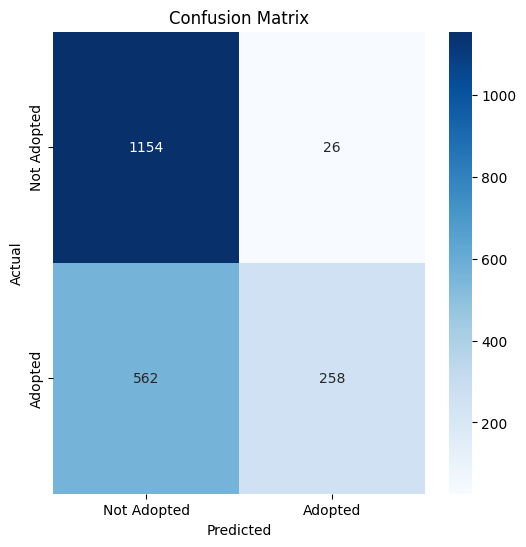

In [64]:
# Предсказание
y_pred_shelter = log_reg.predict(X_test_shelter)

# Метрики качества
accuracy_custom_log = accuracy_score(y_test_shelter, y_pred_shelter)
f1_custom_log = f1_score(y_test_shelter, y_pred_shelter)
recall_custom_log = recall_score(y_test_shelter, y_pred_shelter)
precision_custom_log = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_custom_log:.2f}")
print(f"F1 Score: {f1_custom_log:.2f}")
print(f"Recall: {recall_custom_log:.2f}")
print(f"Precision: {precision_custom_log:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [65]:
# Предсказание
y_pred_house = lin_reg.predict(X_test_house)

# Метрики качества
mae_custom_lin = mean_absolute_error(y_test_house, y_pred_house)
rmse_custom_lin = root_mean_squared_error(y_test_house, y_pred_house)
r2_custom_lin = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_custom_lin}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_lin}")
print(f"R-squared (R^2): {r2_custom_lin}")

Mean Absolute Error (MAE): 141883.258801253
Root Mean Squared Error (RMSE): 226499.0304425228
R-squared (R^2): 0.6540584468565577


### d. Сравнение результатов первоначального бейзлайна и имплементированных моделей

Классификация

In [66]:
print(f"Разница в accuracy: {accuracy_custom_log - accuracy_log}")
print(f"Разница в F1 Score: {f1_custom_log - f1_log}")

Разница в accuracy: -0.056499999999999995
Разница в F1 Score: -0.22792620687731818


Регрессия

In [67]:
print(f"Разница в MAE: {mae_custom_lin - mae_lin}")
print(f"Разница в RMSE: {rmse_custom_lin - rmse_lin}")
print(f"Разница в R^2: {r2_custom_lin - r2_lin}")

Разница в MAE: -127.56883687365917
Разница в RMSE: -150.02169765467988
Разница в R^2: 0.00045842074081103856


### e. Выводы

Точность имплементированной модели для задачи классификации оказалась хуже, чем для встроенной модели. Особенно пострадал Recall

В случае с линейной регрессией, MAE и RMSE понизились, R^2 остался практически идентичным

### f. Добавление техник из улучшенного бейзлайна

Классификация

In [68]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = StandardScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

log_reg = LogisticRegression(C=0.1, intercept_scaling=0.001, max_iter=100, random_state=42)


Регрессия

In [69]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = StandardScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = StandardScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

lin_reg = LinearRegressionCustom(alpha=100)

### g. Обучение на улучшенном бейзлайне

Классификация

In [70]:
log_reg.fit(X_train_shelter, y_train_shelter)

LogisticRegression(C=0.1, intercept_scaling=0.001, random_state=42)

Регрессия

In [71]:
lin_reg.fit(X_train_house, y_train_house)

### h. Оценка качества моделей на улучшенном бейзлайне

Классификация

Accuracy: 0.76
F1 Score: 0.69
Recall: 0.67
Precision: 0.72


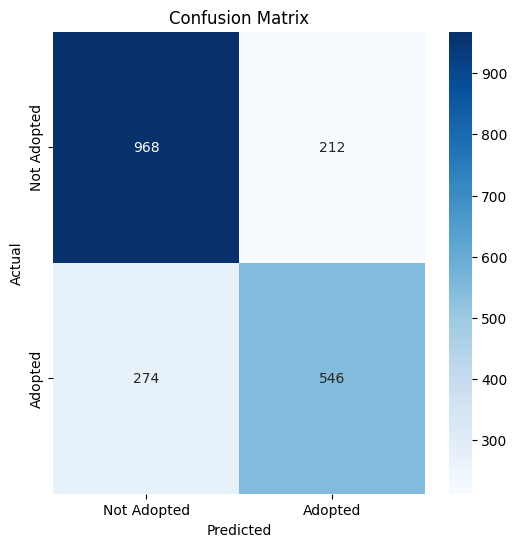

In [72]:
# Предсказание
y_pred_shelter_best = log_reg.predict(X_test_shelter)

# Метрики качества
accuracy_custom_best_log = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_custom_best_log = f1_score(y_test_shelter, y_pred_shelter_best)
recall_custom_best_log = recall_score(y_test_shelter, y_pred_shelter_best)
precision_custom_best_log = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_custom_best_log:.2f}")
print(f"F1 Score: {f1_custom_best_log:.2f}")
print(f"Recall: {recall_custom_best_log:.2f}")
print(f"Precision: {precision_custom_best_log:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter_best)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [73]:
# Предсказание
y_pred_house_best = lin_reg.predict(X_test_house)

# Метрики качества
mae_custom_best_lin = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_custom_best_lin = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_custom_best_lin = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_custom_best_lin}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_best_lin}")
print(f"R-squared (R^2): {r2_custom_best_lin}")

Mean Absolute Error (MAE): 141884.3331394875
Root Mean Squared Error (RMSE): 226502.9408444986
R-squared (R^2): 0.6540465017086445


### i. Сравнение результатов первоначального бейзлайна с улучшенным

Классификация

In [74]:
print(f"Разница в accuracy: {accuracy_custom_best_log - accuracy_best_log }")
print(f"Разница в F1 Score: {f1_custom_best_log  - f1_best_log }")

Разница в accuracy: 0.023249999999999993
Разница в F1 Score: 0.028508100120736013


Регрессия

In [75]:
print(f"Разница в MAE: {mae_custom_best_lin - mae_best_lin}")
print(f"Разница в RMSE: {rmse_custom_best_lin - rmse_best_lin}")
print(f"Разница в R^2: {r2_custom_best_lin - r2_best_lin}")

Разница в MAE: 364.7480412113364
Разница в RMSE: -127.32776409454527
Разница в R^2: 0.00038906220271517356


### j. Выводы

Точность имплементированной модели логистической регрессии с улучшениями для задачи классификации оказалась незначительно лучше, чем на встроенной модели

MAE для имплементированной модели линейной регрессии с улучшениями немного повысилась, а MSE, напротив, уменьшилась, однако незначительно, R^2 остался практически идентичным

# Лабораторная работа 3, Лохматов Никита Игоревич М8О-406Б-21

## 1. Выбор начальных условий в ЛР 1

## 2. Создание бейзлайна и оценка качества

### a. Обучение модели из sklearn для классификации и оценка качества моделей по выбранным метрикам

Импортируем библиотеки

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

Сделаем предобработку данных

In [77]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

Обучение модели

In [78]:
# Инициализация и обучение модели решающего дерева
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_shelter, y_train_shelter)

DecisionTreeClassifier(random_state=42)

Оценка качества модели

Accuracy: 0.73
F1 Score: 0.67
Recall: 0.67
Precision: 0.67


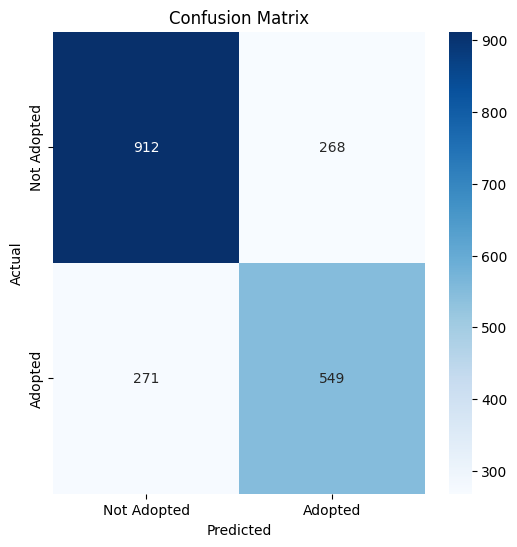

In [79]:
# Предсказание
y_pred_shelter = tree_clf.predict(X_test_shelter)

# Метрики качества
accuracy_tree = accuracy_score(y_test_shelter, y_pred_shelter)
f1_tree = f1_score(y_test_shelter, y_pred_shelter)
recall_tree = recall_score(y_test_shelter, y_pred_shelter)
precision_tree = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"Recall: {recall_tree:.2f}")
print(f"Precision: {precision_tree:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### b. Обучение модели из sklearn для регрессии и оценка качества моделей по выбранным метрикам

Сделаем предобработку данных

In [80]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

Обучение модели

In [81]:
# Инициализация и обучение модели решающего дерева
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_house, y_train_house)

DecisionTreeRegressor(random_state=42)

Оценка качества модели

In [82]:
# Предсказание
y_pred_house = tree_reg.predict(X_test_house)

# Метрики качества
mae_tree = mean_absolute_error(y_test_house, y_pred_house)
rmse_tree = root_mean_squared_error(y_test_house, y_pred_house)
r2_tree = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree:.2f}")
print(f"R^2 Score: {r2_tree:.2f}")

Mean Absolute Error (MAE): 165621.36
Root Mean Squared Error (RMSE): 270434.98
R^2 Score: 0.51


## 3. Улучшение бейзлайна

### a. Гипотезы сформулированы в ЛР 1

### b.1 Проверка гипотез для задачи классификации

1. Масштабирование данных

In [83]:
# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели решающего дерева
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_scaled = tree_clf.predict(X_test_shelter_scaled)

accuracy_scaled = accuracy_score(y_test_shelter, y_pred_shelter_scaled)
f1_scaled = f1_score(y_test_shelter, y_pred_shelter_scaled)
recall_scaled = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_scaled = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_scaled - accuracy_tree:.2f}")
print(f"Разница в F1 Score: {f1_scaled - f1_tree:.2f}")

Гипотеза 1: масштабирование
Accuracy: 0.73
F1 Score: 0.67
Recall: 0.67
Precision: 0.67

Сравнение с бейзлайном:
Разница в Accuracy: 0.00
Разница в F1 Score: 0.00


2. Формирование новых признаков

In [84]:
# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Обновляем обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели решающего дерева
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_new_feature = tree_clf.predict(X_test_shelter_scaled)

accuracy_new_feature = accuracy_score(y_test_shelter, y_pred_shelter_new_feature)
f1_new_feature = f1_score(y_test_shelter, y_pred_shelter_new_feature)
recall_new_feature = recall_score(y_test_shelter, y_pred_shelter_new_feature)
precision_new_feature = precision_score(y_test_shelter, y_pred_shelter_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Accuracy: {accuracy_new_feature:.2f}")
print(f"F1 Score: {f1_new_feature:.2f}")
print(f"Recall: {recall_new_feature:.2f}")
print(f"Precision: {precision_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy_tree:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1_tree:.2f}")

Гипотеза 2: добавление нового признака
Accuracy: 0.74
F1 Score: 0.68
Recall: 0.67
Precision: 0.68

Сравнение с бейзлайном:
Разница в Accuracy: 0.01
Разница в F1 Score: 0.01


3. Подбор гиперпараметров

In [85]:
# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Определяем сетку гиперпараметров
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [5, 7, 10],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_shelter_scaled, y_train_shelter)

# Лучшие параметры и их оценка
best_tree_clf = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_best = best_tree_clf.predict(X_test_shelter_scaled)

accuracy_best = accuracy_score(y_test_shelter, y_pred_best)
f1_best = f1_score(y_test_shelter, y_pred_best)
recall_best = recall_score(y_test_shelter, y_pred_best)
precision_best = precision_score(y_test_shelter, y_pred_best)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_best - accuracy_tree:.2f}")
print(f"Разница в F1 Score: {f1_best - f1_tree:.2f}")


Лучшие параметры: {'max_depth': 10, 'min_samples_split': 7}
Лучшая кросс-валидация: 0.78

Гипотеза 3: подбор гиперпараметров
Accuracy: 0.77
F1 Score: 0.71
Recall: 0.71
Precision: 0.72

Сравнение с бейзлайном:
Разница в Accuracy: 0.03
Разница в F1 Score: 0.04


### b.2 Проверка гипотез для задачи регрессии

1. Масштабирование данных

In [86]:
# Масштабирование данных
scaler_house = MinMaxScaler()
X_train_house_scaled = scaler_house.fit_transform(X_train_house)
X_test_house_scaled = scaler_house.transform(X_test_house)

# Обучение линейной регрессии
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_scaled = tree_reg.predict(X_test_house_scaled)
mae_scaled = mean_absolute_error(y_test_house, y_pred_house_scaled)
rmse_scaled = root_mean_squared_error(y_test_house, y_pred_house_scaled)
r2_scaled = r2_score(y_test_house, y_pred_house_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.2f}")
print(f"R-squared (R^2): {r2_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_scaled - mae_tree:.2f}")
print(f"Разница в RMSE: {rmse_scaled - rmse_tree:.2f}")
print(f"Разница в R^2: {r2_scaled - r2_tree:.2f}")

Гипотеза 1: масштабирование
Mean Absolute Error (MAE): 164654.56
Root Mean Squared Error (RMSE): 267617.91
R-squared (R^2): 0.52

Сравнение с бейзлайном:
Разница в MAE: -966.80
Разница в RMSE: -2817.07
Разница в R^2: 0.01


2. Формирование новых признаков

In [87]:
# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Обновляем данные
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_new_feature = tree_reg.predict(X_test_house_scaled)
mae_new_feature = mean_absolute_error(y_test_house, y_pred_house_new_feature)
rmse_new_feature = root_mean_squared_error(y_test_house, y_pred_house_new_feature)
r2_new_feature = r2_score(y_test_house, y_pred_house_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Mean Absolute Error (MAE): {mae_new_feature:.2f}")
print(f"Root Mean Squared  Error (RMSE): {rmse_new_feature:.2f}")
print(f"R-squared (R^2): {r2_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_new_feature - mae_tree:.2f}")
print(f"Разница в RMSE: {rmse_new_feature - rmse_tree:.2f}")
print(f"Разница в R^2: {r2_new_feature - r2_tree:.2f}")

Гипотеза 2: добавление нового признака
Mean Absolute Error (MAE): 170866.27
Root Mean Squared  Error (RMSE): 272119.57
R-squared (R^2): 0.50

Сравнение с бейзлайном:
Разница в MAE: 5244.91
Разница в RMSE: 1684.59
Разница в R^2: -0.01


3. Подбор гиперпараметров

In [88]:
# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

# Подбор гиперпараметров
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [5, 7, 10],
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train_house_scaled, y_train_house)

print("Лучшие параметры: ", grid_search.best_params_)
print("Лучшая кросс-валидация: ", grid_search.best_score_)
print()

# Лучшие параметры и метрики
best_ridge = grid_search.best_estimator_
y_pred_house_gs = best_ridge.predict(X_test_house_scaled)
mae_gs = mean_absolute_error(y_test_house, y_pred_house_gs)
rmse_gs = root_mean_squared_error(y_test_house, y_pred_house_gs)
r2_gs = r2_score(y_test_house, y_pred_house_gs)

print("Гипотеза 3: подбор гиперпараметров")
print(f"Mean Absolute Error (MAE): {mae_gs:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gs:.2f}")
print(f"R-squared (R^2): {r2_gs:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_gs - mae_tree:.2f}")
print(f"Разница в RMSE: {rmse_gs - rmse_tree:.2f}")
print(f"Разница в R^2: {r2_gs - r2_tree:.2f}")

Лучшие параметры:  {'max_depth': 5, 'min_samples_split': 10}
Лучшая кросс-валидация:  0.6258271950758519

Гипотеза 3: подбор гиперпараметров
Mean Absolute Error (MAE): 144253.57
Root Mean Squared Error (RMSE): 224019.85
R-squared (R^2): 0.66

Сравнение с бейзлайном:
Разница в MAE: -21367.79
Разница в RMSE: -46415.13
Разница в R^2: 0.15


### c. Формирование улучшенного бейзлайна

В улучшенном бейзлайне для классификации добавим масштабирование, параметры: {'max_depth': 10, 'min_samples_split': 7}

В улучшенном бейзлайне для регрессии добавим масштабирование, параметры: {'max_depth': 5, 'min_samples_split': 10}

Классификация

In [89]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = MinMaxScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

tree_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=7, random_state=42)

Регрессия

In [90]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

d. Обучение модели с улучшенным бейзлайном 

Классификация

In [91]:
tree_clf.fit(X_train_shelter, y_train_shelter)

DecisionTreeClassifier(max_depth=10, min_samples_split=7, random_state=42)

Регрессия

In [92]:
tree_reg.fit(X_train_house, y_train_house)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

e. Оценка качества моделей с улучшенным бейзлайном 

Классификация

In [93]:
# Предсказание
y_pred_shelter_best = tree_clf.predict(X_test_shelter)

# Метрики качества
accuracy_best_tree = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_best_tree = f1_score(y_test_shelter, y_pred_shelter_best)
recall_best_tree = recall_score(y_test_shelter, y_pred_shelter_best)
precision_best_tree = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_best_tree:.2f}")
print(f"F1 Score: {f1_best_tree:.2f}")
print(f"Recall: {recall_best_tree:.2f}")
print(f"Precision: {precision_best_tree:.2f}")

Accuracy: 0.75
F1 Score: 0.65
Recall: 0.56
Precision: 0.77


Регрессия

In [94]:
# Предсказание
y_pred_house_best = tree_reg.predict(X_test_house)

# Метрики качества
mae_best_tree = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_best_tree = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_best_tree = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_best_tree}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_tree}")
print(f"R-squared (R^2): {r2_best_tree}")

Mean Absolute Error (MAE): 144253.56810940392
Root Mean Squared Error (RMSE): 224019.8540238065
R-squared (R^2): 0.6615901027326043


### f. Сравнение результатов первоначального бейзлайна с улучшенным бейзлайном

Классификация

In [95]:
print(f"Разница в accuracy: {accuracy_best_tree - accuracy_tree}")
print(f"Разница в F1 Score: {f1_best_tree - f1_tree}")

Разница в accuracy: 0.019499999999999962
Разница в F1 Score: -0.02235659721953731


Регрессия

In [96]:
print(f"Разница в MAE: {mae_best_tree - mae_tree}")
print(f"Разница в MSE: {rmse_best_tree - rmse_tree}")
print(f"Разница в R^2: {r2_best_tree - r2_tree}")

Разница в MAE: -21367.787390596088
Разница в MSE: -46415.12816870268
Разница в R^2: 0.15475910853447394


### g. Выводы

**Вывод по классификации:**

Внедрение улучшений повысило точность, но понизило F1

**Вывод по регрессии:**

Улучшения понизили MAE и RMSE, повысили R^2

**Общие выводы:**:

1. Масштабирование улучшает точность, так как делает все признаки равнозначными
2. Оптимальная настройка гиперпараметров, таких как количество соседей, повышает качество модели, если сравнивать с настройками по умолчанию

## 4. Имплементация алгоритма машинного обучения 

### a. Самостоятельная имплементация алгоритмов машинного обучения для классификации и регрессии

Базовый класс дерева

In [97]:
import numpy as np


class DecisionTreeBase:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def _best_split(self, X, y):
        raise NotImplementedError("Этот метод должен быть реализован в дочернем классе.")

    def _build_tree(self, X, y, depth=0):
        """
        Рекурсивное построение дерева.
        """
        n_samples, n_features = X.shape

        # Условия остановки
        if (self.max_depth is not None and depth >= self.max_depth) or n_samples < self.min_samples_split:
            return self._leaf_value(y)

        # Найти лучшее разбиение
        split = self._best_split(X, y)

        if split is None:  # Если разбиение невозможно
            return self._leaf_value(y)

        feature_index, threshold, left_mask, right_mask = split
        left_tree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature_index': feature_index,
            'threshold': threshold,
            'left': left_tree,
            'right': right_tree
        }

    def fit(self, X, y):
        """
        Обучение модели.
        """
        X = X.reset_index(drop=True)
        y = y.reset_index(drop=True)
        self.tree = self._build_tree(X, y)

    def _predict_sample(self, x, tree):
        """
        Предсказание для одного примера.
        """
        if not isinstance(tree, dict):
            return tree

        feature_value = x.iloc[tree['feature_index']]

        if feature_value <= tree['threshold']:
            return self._predict_sample(x, tree['left'])
        else:
            return self._predict_sample(x, tree['right'])

    def predict(self, X):
        """
        Предсказание для множества данных.
        """
        return np.array([self._predict_sample(row, self.tree) for _, row in X.iterrows()])

Имплементация решающего дерева для классификации

In [98]:
class DecisionTreeClassifierCustom(DecisionTreeBase):
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        super().__init__(max_depth, min_samples_split, min_samples_leaf)

    def _gini_impurity(self, left_y, right_y):
        """
        Вычисляет критерий Джини для разделения.
        """
        def gini(y):
            m = len(y)

            if m == 0:
                return 0
            
            p = np.bincount(y) / m

            return 1 - np.sum(p ** 2)

        total = len(left_y) + len(right_y)

        return (len(left_y) / total) * gini(left_y) + (len(right_y) / total) * gini(right_y)

    def _leaf_value(self, y):
        """
        Возвращает наиболее часто встречающийся класс.
        """
        return np.bincount(y).argmax()

    def _best_split(self, X, y):
        best_gini = float('inf')
        best_split = None
        n_samples, n_features = X.shape

        for feature_index in range(n_features):
            thresholds = np.unique(X.iloc[:, feature_index])

            for threshold in thresholds:
                left_mask = X.iloc[:, feature_index] <= threshold
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]

                if len(left_y) >= self.min_samples_leaf and len(right_y) >= self.min_samples_leaf:
                    gini = self._gini_impurity(left_y, right_y)
                    if gini < best_gini:
                        best_gini = gini
                        best_split = (feature_index, threshold, left_mask, right_mask)

        return best_split

Имплементация решающего дерева для регрессии

In [99]:
class DecisionTreeRegressorCustom(DecisionTreeBase):
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        super().__init__(max_depth, min_samples_split, min_samples_leaf)

    def _variance_reduction(self, left_y, right_y):
        """
        Вычисляет снижение дисперсии.
        """
        def variance(y):
            return np.var(y) * len(y)

        total_var = variance(left_y) + variance(right_y)
        total_len = len(left_y) + len(right_y)
        left_weight = len(left_y) / total_len
        right_weight = len(right_y) / total_len

        return total_var - (left_weight * variance(left_y) + right_weight * variance(right_y))

    def _leaf_value(self, y):
        """
        Возвращает среднее значение.
        """
        return np.mean(y)

    def _best_split(self, X, y):
        best_reduction = -float('inf')
        best_split = None
        n_samples, n_features = X.shape

        for feature_index in range(n_features):
            thresholds = np.unique(X.iloc[:, feature_index])
            
            for threshold in thresholds:
                left_mask = X.iloc[:, feature_index] <= threshold
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]

                if len(left_y) >= self.min_samples_leaf and len(right_y) >= self.min_samples_leaf:
                    reduction = self._variance_reduction(left_y, right_y)

                    if reduction > best_reduction:
                        best_reduction = reduction
                        best_split = (feature_index, threshold, left_mask, right_mask)

        return best_split

### b. Обучение имплементированной модели

Классификация

In [100]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

tree_clf = DecisionTreeClassifierCustom(max_depth=5)
tree_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [101]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

tree_reg = DecisionTreeRegressorCustom(max_depth=5)
tree_reg.fit(X_train_house, y_train_house)

### c. Оценка качества имплементированных моделей

Классификация

Accuracy: 0.71
F1 Score: 0.48
Recall: 0.32
Precision: 0.91


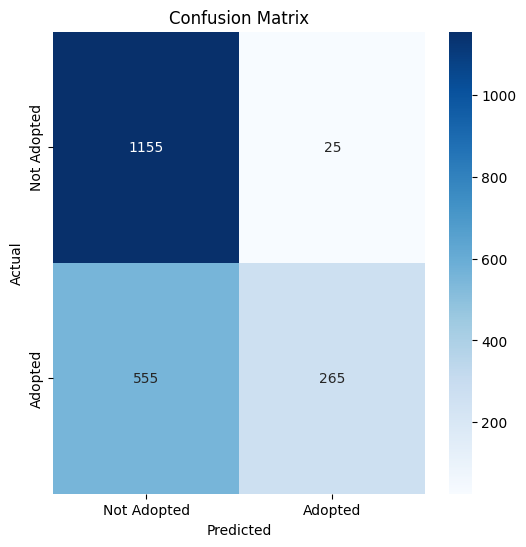

In [102]:
# Предсказание
y_pred_shelter = tree_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_tree = accuracy_score(y_test_shelter, y_pred_shelter)
f1_custom_tree = f1_score(y_test_shelter, y_pred_shelter)
recall_custom_tree = recall_score(y_test_shelter, y_pred_shelter)
precision_custom_tree = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_custom_tree:.2f}")
print(f"F1 Score: {f1_custom_tree:.2f}")
print(f"Recall: {recall_custom_tree:.2f}")
print(f"Precision: {precision_custom_tree:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [103]:
# Предсказание
y_pred_house = tree_reg.predict(X_test_house)

# Метрики качества
mae_custom_tree = mean_absolute_error(y_test_house, y_pred_house)
rmse_custom_tree = root_mean_squared_error(y_test_house, y_pred_house)
r2_custom_tree = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_custom_tree}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_tree}")
print(f"R-squared (R^2): {r2_custom_tree}")

Mean Absolute Error (MAE): 221863.99788152167
Root Mean Squared Error (RMSE): 362256.058102755
R-squared (R^2): 0.11508542066131588


### d. Сравнение результатов первоначального бейзлайна и имплементированных моделей

Классификация

In [104]:
print(f"Разница в accuracy: {accuracy_custom_tree - accuracy_tree}")
print(f"Разница в F1 Score: {f1_custom_tree - f1_tree}")

Разница в accuracy: -0.020500000000000074
Разница в F1 Score: -0.19326167951702466


Регрессия

In [105]:
print(f"Разница в MAE: {mae_custom_tree - mae_tree}")
print(f"Разница в RMSE: {rmse_custom_tree - rmse_tree}")
print(f"Разница в R^2: {r2_custom_tree - r2_tree}")

Разница в MAE: 56242.64238152167
Разница в RMSE: 91821.07591024583
Разница в R^2: -0.3917455735368145


### e. Выводы

Точность имплементированной модели для задачи классификации оказалась хуже, чем для встроенной модели. Особенно пострадал Recall

В случае с линейной регрессией, ошибки увеличились, а R^2 стал сильно хуже

### f. Добавление техник из улучшенного бейзлайна

Классификация

In [106]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler = MinMaxScaler()
X_train_shelter = pd.DataFrame(scaler.fit_transform(X_train_shelter), columns=X_shelter.columns)
X_test_shelter = pd.DataFrame(scaler.transform(X_test_shelter), columns=X_shelter.columns)

tree_clf = DecisionTreeClassifierCustom(max_depth=10, min_samples_split=7)

Регрессия

In [107]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = pd.DataFrame(scaler.fit_transform(X_train_house), columns=X_house.columns)
X_test_house = pd.DataFrame(scaler.transform(X_test_house), columns=X_house.columns)

tree_reg = DecisionTreeRegressorCustom(max_depth=5, min_samples_split=10)

### g. Обучение на улучшенном бейзлайне

Классификация

In [108]:
tree_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [109]:
tree_reg.fit(X_train_house, y_train_house)

### h. Оценка качества моделей на улучшенном бейзлайне

Классификация

Accuracy: 0.75
F1 Score: 0.65
Recall: 0.56
Precision: 0.77


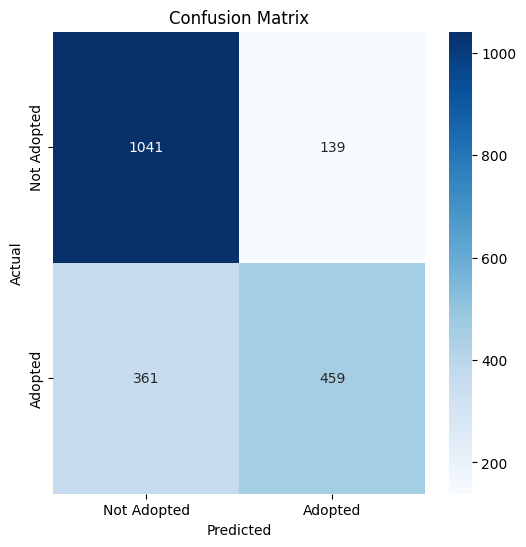

In [110]:
# Предсказание
y_pred_shelter_best = tree_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_best_tree = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_custom_best_tree = f1_score(y_test_shelter, y_pred_shelter_best)
recall_custom_best_tree = recall_score(y_test_shelter, y_pred_shelter_best)
precision_custom_best_tree = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_custom_best_tree:.2f}")
print(f"F1 Score: {f1_custom_best_tree:.2f}")
print(f"Recall: {recall_custom_best_tree:.2f}")
print(f"Precision: {precision_custom_best_tree:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter_best)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [111]:
# Предсказание
y_pred_house_best = tree_reg.predict(X_test_house)

# Метрики качества
mae_custom_best_tree = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_custom_best_tree = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_custom_best_tree = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_custom_best_tree}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_best_tree}")
print(f"R-squared (R^2): {r2_custom_best_tree}")

Mean Absolute Error (MAE): 221863.99788152167
Root Mean Squared Error (RMSE): 362256.058102755
R-squared (R^2): 0.11508542066131588


### i. Сравнение результатов первоначального бейзлайна с улучшенным

Классификация

In [112]:
print(f"Разница в accuracy: {accuracy_custom_best_tree - accuracy_best_tree}")
print(f"Разница в F1 Score: {f1_custom_best_tree - f1_best_tree}")

Разница в accuracy: 0.0
Разница в F1 Score: -0.0009918686607194305


Регрессия

In [113]:
print(f"Разница в MAE: {mae_custom_best_tree - mae_best_tree}")
print(f"Разница в RMSE: {rmse_custom_best_tree - rmse_best_tree}")
print(f"Разница в R^2: {r2_custom_best_tree - r2_best_tree}")

Разница в MAE: 77610.42977211776
Разница в RMSE: 138236.2040789485
Разница в R^2: -0.5465046820712884


### j. Выводы

Точность имплементированной модели с улучшениями для задачи классификации оказалась идентичной встроенной модели

Ошибки в имплементированной модели с улучшениями увеличились, R^2 очень сильно упал. Скорее всего это связано с тем, что были неправильно подобраны гиперпараметры

# Лабораторная работа 4, Лохматов Никита Игоревич М8О-406Б-21

## 1. Выбор начальных условий в ЛР 1

## 2. Создание бейзлайна и оценка качества

### a. Обучение модели из sklearn для классификации и оценка качества моделей по выбранным метрикам

Импортируем библиотеки

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

Сделаем предобработку данных

In [115]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

Обучение модели

In [116]:
# Инициализация и обучение модели случайного леса
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_shelter, y_train_shelter)

RandomForestClassifier()

Оценка качества модели

Accuracy: 0.75
F1 Score: 0.69
Recall: 0.67
Precision: 0.71


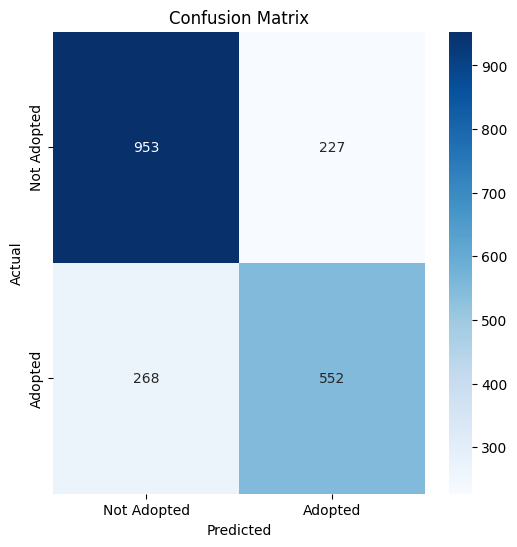

In [117]:
# Предсказание
y_pred_shelter = forest_clf.predict(X_test_shelter)

# Метрики качества
accuracy_forest = accuracy_score(y_test_shelter, y_pred_shelter)
f1_forest = f1_score(y_test_shelter, y_pred_shelter)
recall_forest = recall_score(y_test_shelter, y_pred_shelter)
precision_forest = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_forest:.2f}")
print(f"F1 Score: {f1_forest:.2f}")
print(f"Recall: {recall_forest:.2f}")
print(f"Precision: {precision_forest:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### b. Обучение модели из sklearn для регрессии и оценка качества моделей по выбранным метрикам

Сделаем предобработку данных

In [118]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

Обучение модели

In [119]:
# Инициализация и обучение модели случайного леса
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_house, y_train_house)

RandomForestRegressor()

Оценка качества модели

In [120]:
# Предсказание
y_pred_house = forest_reg.predict(X_test_house)

# Метрики качества
mae_forest = mean_absolute_error(y_test_house, y_pred_house)
rmse_forest = root_mean_squared_error(y_test_house, y_pred_house)
r2_forest = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_forest:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_forest:.2f}")
print(f"R^2 Score: {r2_forest:.2f}")

Mean Absolute Error (MAE): 125980.82
Root Mean Squared Error (RMSE): 197415.05
R^2 Score: 0.74


## 3. Улучшение бейзлайна

### a. Гипотезы сформулированы в ЛР 1

### b.1 Проверка гипотез для задачи классификации

1. Масштабирование данных

In [121]:
# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели случайного леса
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_scaled = forest_clf.predict(X_test_shelter_scaled)

accuracy_scaled = accuracy_score(y_test_shelter, y_pred_shelter_scaled)
f1_scaled = f1_score(y_test_shelter, y_pred_shelter_scaled)
recall_scaled = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_scaled = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_scaled - accuracy_forest:.2f}")
print(f"Разница в F1 Score: {f1_scaled - f1_forest:.2f}")

Гипотеза 1: масштабирование
Accuracy: 0.75
F1 Score: 0.69
Recall: 0.67
Precision: 0.71

Сравнение с бейзлайном:
Разница в Accuracy: -0.00
Разница в F1 Score: -0.00


2. Формирование новых признаков

In [122]:
# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Обновляем обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели случайного леса
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_new_feature = forest_clf.predict(X_test_shelter_scaled)

accuracy_new_feature = accuracy_score(y_test_shelter, y_pred_shelter_new_feature)
f1_new_feature = f1_score(y_test_shelter, y_pred_shelter_new_feature)
recall_new_feature = recall_score(y_test_shelter, y_pred_shelter_new_feature)
precision_new_feature = precision_score(y_test_shelter, y_pred_shelter_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Accuracy: {accuracy_new_feature:.2f}")
print(f"F1 Score: {f1_new_feature:.2f}")
print(f"Recall: {recall_new_feature:.2f}")
print(f"Precision: {precision_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy_forest:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1_forest:.2f}")

Гипотеза 2: добавление нового признака
Accuracy: 0.75
F1 Score: 0.69
Recall: 0.67
Precision: 0.70

Сравнение с бейзлайном:
Разница в Accuracy: -0.00
Разница в F1 Score: -0.00


3. Подбор гиперпараметров

In [123]:
# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Определяем сетку гиперпараметров
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [10, 12, 15],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_shelter_scaled, y_train_shelter)

# Лучшие параметры и их оценка
best_forest_clf = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_best = best_forest_clf.predict(X_test_shelter_scaled)

accuracy_best = accuracy_score(y_test_shelter, y_pred_best)
f1_best = f1_score(y_test_shelter, y_pred_best)
recall_best = recall_score(y_test_shelter, y_pred_best)
precision_best = precision_score(y_test_shelter, y_pred_best)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_best - accuracy_forest:.2f}")
print(f"Разница в F1 Score: {f1_best - f1_forest:.2f}")

Лучшие параметры: {'max_depth': None, 'min_samples_split': 12, 'n_estimators': 150}
Лучшая кросс-валидация: 0.78

Гипотеза 3: подбор гиперпараметров
Accuracy: 0.76
F1 Score: 0.70
Recall: 0.67
Precision: 0.73

Сравнение с бейзлайном:
Разница в Accuracy: 0.01
Разница в F1 Score: 0.00


### b.2 Проверка гипотез для задачи регрессии

1. Масштабирование данных

In [124]:
# Масштабирование данных
scaler_house = MinMaxScaler()
X_train_house_scaled = scaler_house.fit_transform(X_train_house)
X_test_house_scaled = scaler_house.transform(X_test_house)

# Обучение модели случайного леса
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_scaled = forest_reg.predict(X_test_house_scaled)
mae_scaled = mean_absolute_error(y_test_house, y_pred_house_scaled)
rmse_scaled = root_mean_squared_error(y_test_house, y_pred_house_scaled)
r2_scaled = r2_score(y_test_house, y_pred_house_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.2f}")
print(f"R-squared (R^2): {r2_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_scaled - mae_forest:.2f}")
print(f"Разница в RMSE: {rmse_scaled - rmse_forest:.2f}")
print(f"Разница в R^2: {r2_scaled - r2_forest:.2f}")

Гипотеза 1: масштабирование
Mean Absolute Error (MAE): 125789.53
Root Mean Squared Error (RMSE): 195797.27
R-squared (R^2): 0.74

Сравнение с бейзлайном:
Разница в MAE: -191.29
Разница в RMSE: -1617.78
Разница в R^2: 0.00


2. Формирование новых признаков

In [125]:
# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Обновляем данные
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели случайного леса
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_new_feature = forest_reg.predict(X_test_house_scaled)
mae_new_feature = mean_absolute_error(y_test_house, y_pred_house_new_feature)
rmse_new_feature = root_mean_squared_error(y_test_house, y_pred_house_new_feature)
r2_new_feature = r2_score(y_test_house, y_pred_house_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Mean Absolute Error (MAE): {mae_new_feature:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_new_feature:.2f}")
print(f"R-squared (R^2): {r2_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_new_feature - mae_forest:.2f}")
print(f"Разница в RMSE: {rmse_new_feature - rmse_forest:.2f}")
print(f"Разница в R^2: {r2_new_feature - r2_forest:.2f}")

Гипотеза 2: добавление нового признака
Mean Absolute Error (MAE): 125584.35
Root Mean Squared Error (RMSE): 194390.08
R-squared (R^2): 0.75

Сравнение с бейзлайном:
Разница в MAE: -396.47
Разница в RMSE: -3024.97
Разница в R^2: 0.01


3. Подбор гиперпараметров

In [126]:
# Масштабирование данных
scaler = MinMaxScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Определяем сетку гиперпараметров
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [10, 12, 15],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train_house_scaled, y_train_house)

# Лучшие параметры и их оценка
best_forest_reg = grid_search.best_estimator_
best_score = -grid_search.best_score_  # Инвертируем, так как использовался отрицательный MAE

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация (MAE): {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_house_gs = best_forest_reg.predict(X_test_house_scaled)
mae_gs = mean_absolute_error(y_test_house, y_pred_house_gs)
rmse_gs = root_mean_squared_error(y_test_house, y_pred_house_gs)
r2_gs = r2_score(y_test_house, y_pred_house_gs)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Mean Absolute Error (MAE): {mae_gs:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gs:.2f}")
print(f"R-squared (R^2): {r2_gs:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_gs - mae_forest:.2f}")
print(f"Разница в RMSE: {rmse_gs - rmse_forest:.2f}")
print(f"Разница в R^2: {r2_gs - r2_forest:.2f}")

Лучшие параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Лучшая кросс-валидация (MAE): -0.71

Гипотеза 3: подбор гиперпараметров
Mean Absolute Error (MAE): 125714.66
Root Mean Squared Error (RMSE): 194522.49
R-squared (R^2): 0.74

Сравнение с бейзлайном:
Разница в MAE: -266.16
Разница в RMSE: -2892.56
Разница в R^2: 0.01


### c. Формирование улучшенного бейзлайна

В улучшенном бейзлайне для классификации добавим масштабирование, параметры: {'max_depth': None, 'min_samples_split': 12, 'n_estimators': 150}, а также новый признак: AgeInDays и IsDog

В улучшенном бейзлайне для регрессии добавим масштабирование, параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}, а также добавим новый признак: total_area

Классификация

In [127]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = MinMaxScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

forest_clf = RandomForestClassifier(max_depth=None, min_samples_split=10, n_estimators=150)

Регрессия

In [128]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная


# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

forest_reg = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=100)

d. Обучение модели с улучшенным бейзлайном 

Классификация

In [129]:
forest_clf.fit(X_train_shelter, y_train_shelter)

RandomForestClassifier(min_samples_split=10, n_estimators=150)

Регрессия

In [130]:
forest_reg.fit(X_train_house, y_train_house)

RandomForestRegressor(max_depth=10, min_samples_split=10)

e. Оценка качества моделей с улучшенным бейзлайном 

Классификация

In [131]:
# Предсказание
y_pred_shelter_best = forest_clf.predict(X_test_shelter)

# Метрики качества
accuracy_best_forest = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_best_forest = f1_score(y_test_shelter, y_pred_shelter_best)
recall_best_forest = recall_score(y_test_shelter, y_pred_shelter_best)
precision_best_forest = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_best_forest:.2f}")
print(f"F1 Score: {f1_best_forest:.2f}")
print(f"Recall: {recall_best_forest:.2f}")
print(f"Precision: {precision_best_forest:.2f}")

Accuracy: 0.76
F1 Score: 0.70
Recall: 0.67
Precision: 0.73


Регрессия

In [132]:
# Предсказание
y_pred_house_best = forest_reg.predict(X_test_house)

# Метрики качества
mae_best_forest = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_best_forest = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_best_forest = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_best_forest}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_forest}")
print(f"R-squared (R^2): {r2_best_forest}")

Mean Absolute Error (MAE): 125162.05401369536
Root Mean Squared Error (RMSE): 193739.06627888224
R-squared (R^2): 0.7468928340965981


### f. Сравнение результатов первоначального бейзлайна с улучшенным бейзлайном

Классификация

In [133]:
print(f"Разница в accuracy: {accuracy_best_forest - accuracy_forest}")
print(f"Разница в F1 Score: {f1_best_forest - f1_forest}")

Разница в accuracy: 0.010500000000000065
Разница в F1 Score: 0.008424897072741633


Регрессия

In [134]:
print(f"Разница в MAE: {mae_best_forest - mae_forest}")
print(f"Разница в RMSE: {rmse_best_forest - rmse_forest}")
print(f"Разница в R^2: {r2_best_forest - r2_forest}")

Разница в MAE: -818.7674400070246
Разница в RMSE: -3675.9810683676915
Разница в R^2: 0.009695968687190915


### g. Выводы

**Вывод по классификации:**

Улучшения повысили точность и F1

**Вывод по регрессии:**

Улучшения повысили MAE, понизили RMSE, а также незначительно повысили R^2

**Общие выводы:**:

1. Масштабирование улучшает точность, так как делает все признаки равнозначными
2. Оптимальная настройка гиперпараметров, таких как количество соседей, повышает качество модели, если сравнивать с настройками по умолчанию

## 4. Имплементация алгоритма машинного обучения 

### a. Самостоятельная имплементация алгоритмов машинного обучения для классификации и регрессии

Имплементация случайного леса для классификации

In [135]:
import numpy as np
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.utils import resample


class RandomForestClassifierCustom:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        """
        Инициализация классификатора случайного леса.
        :param n_estimators: количество деревьев.
        :param max_depth: максимальная глубина дерева.
        :param min_samples_split: минимальное количество примеров для разделения узла.
        :param min_samples_leaf: минимальное количество примеров в листе.
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.forests = []

    def fit(self, X_train, y_train):
        """
        Обучение модели случайного леса.
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие метки (вектор длины N).
        """
        for _ in range(self.n_estimators):
            # Бутстраппинг: выбор случайного поднабора данных с возвращением
            X_resampled, y_resampled = resample(X_train, y_train, random_state=42)
            
            # Строим дерево решений для поднабора данных
            forest = DecisionTreeClassifier(max_depth=self.max_depth,
                                          min_samples_split=self.min_samples_split,
                                          min_samples_leaf=self.min_samples_leaf)
            forest.fit(X_resampled, y_resampled)
            self.forests.append(forest)

    def predict(self, X_test):
        """
        Предсказание меток для тестовых данных.
        :param X_test: тестовые признаки (матрица LxM).
        :return: предсказанные метки для тестовых данных.
        """
        # Получаем предсказания от всех деревьев
        forest_preds = np.array([forest.predict(X_test) for forest in self.forests])
        
        # Прогнозируем на основе голосования (модального значения)
        return np.array([Counter(preds).most_common(1)[0][0] for preds in forest_preds.T])

Имплементация случайного леса для регрессии

In [136]:
class RandomForestRegressorCustom:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        """
        Инициализация регрессора случайного леса.
        :param n_estimators: количество деревьев.
        :param max_depth: максимальная глубина дерева.
        :param min_samples_split: минимальное количество примеров для разделения узла.
        :param min_samples_leaf: минимальное количество примеров в листе.
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.forests = []

    def fit(self, X_train, y_train):
        """
        Обучение модели случайного леса.
        :param X_train: обучающие признаки (матрица NxM).
        :param y_train: обучающие целевые значения (вектор длины N).
        """
        for _ in range(self.n_estimators):
            # Бутстраппинг: выбор случайного поднабора данных с возвращением
            X_resampled, y_resampled = resample(X_train, y_train, random_state=42)
            
            # Строим дерево решений для поднабора данных
            forest = DecisionTreeRegressor(max_depth=self.max_depth,
                                          min_samples_split=self.min_samples_split,
                                          min_samples_leaf=self.min_samples_leaf)
            forest.fit(X_resampled, y_resampled)
            self.forests.append(forest)

    def predict(self, X_test):
        """
        Предсказание целевых значений для тестовых данных.
        :param X_test: тестовые признаки (матрица LxM).
        :return: предсказанные целевые значения для тестовых данных.
        """
        # Получаем предсказания от всех деревьев
        forest_preds = np.array([forest.predict(X_test) for forest in self.forests])
        
        # Прогнозируем как среднее от всех предсказаний
        return np.mean(forest_preds, axis=0)

### b. Обучение имплементированной модели

Классификация

In [137]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

forest_clf = RandomForestClassifierCustom()
forest_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [138]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

forest_reg = RandomForestRegressorCustom()
forest_reg.fit(X_train_house, y_train_house)

### c. Оценка качества имплементированных моделей

Классификация

Accuracy: 0.72
F1 Score: 0.65
Recall: 0.64
Precision: 0.67


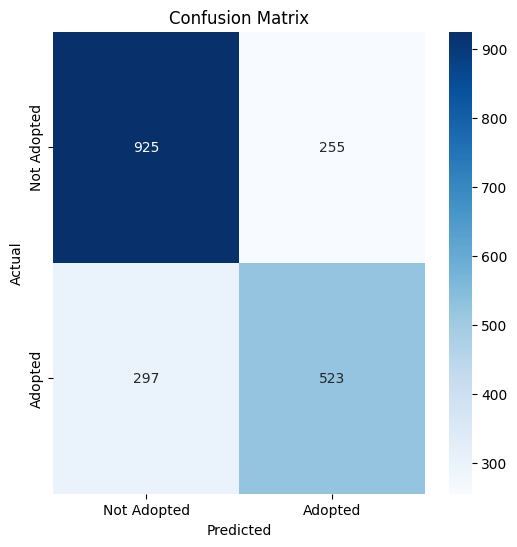

In [139]:
# Предсказание
y_pred_shelter = forest_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_forest = accuracy_score(y_test_shelter, y_pred_shelter)
f1_custom_forest = f1_score(y_test_shelter, y_pred_shelter)
recall_custom_forest = recall_score(y_test_shelter, y_pred_shelter)
precision_custom_forest = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_custom_forest:.2f}")
print(f"F1 Score: {f1_custom_forest:.2f}")
print(f"Recall: {recall_custom_forest:.2f}")
print(f"Precision: {precision_custom_forest:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [140]:
# Предсказание
y_pred_house = forest_reg.predict(X_test_house)

# Метрики качества
mae_custom_forest = mean_absolute_error(y_test_house, y_pred_house)
rmse_custom_forest = root_mean_squared_error(y_test_house, y_pred_house)
r2_custom_forest = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_custom_forest}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_forest}")
print(f"R-squared (R^2): {r2_custom_forest}")

Mean Absolute Error (MAE): 171256.5791325
Root Mean Squared Error (RMSE): 280589.843040208
R-squared (R^2): 0.46909852915041395


### d. Сравнение результатов первоначального бейзлайна и имплементированных моделей

Классификация

In [141]:
print(f"Разница в accuracy: {accuracy_custom_forest - accuracy_forest}")
print(f"Разница в F1 Score: {f1_custom_forest - f1_forest}")

Разница в accuracy: -0.02849999999999997
Разница в F1 Score: -0.0358633094369839


Регрессия

In [142]:
print(f"Разница в MAE: {mae_custom_forest - mae_forest}")
print(f"Разница в RMSE: {rmse_custom_forest - rmse_forest}")
print(f"Разница в R^2: {r2_custom_forest - r2_forest}")

Разница в MAE: 45275.7576787976
Разница в RMSE: 83174.79569295805
Разница в R^2: -0.26809833625899326


### e. Выводы

Точность имплементированной модели для задачи классификации оказалась хуже, чем для встроенной модели. Особенно пострадал Recall

В случае с линейной регрессией, ошибки увеличились, а R^2 стал заметно ниже

### f. Добавление техник из улучшенного бейзлайна

Классификация

In [143]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = MinMaxScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

forest_clf = RandomForestClassifierCustom(max_depth=None, min_samples_split=10, n_estimators=150)

Регрессия

In [144]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная


# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

forest_reg = RandomForestRegressorCustom(max_depth=10, min_samples_split=10, n_estimators=100)

### g. Обучение на улучшенном бейзлайне

Классификация

In [145]:
forest_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [146]:
forest_reg.fit(X_train_house, y_train_house)

### h. Оценка качества моделей на улучшенном бейзлайне

Классификация

Accuracy: 0.72
F1 Score: 0.66
Recall: 0.65
Precision: 0.67


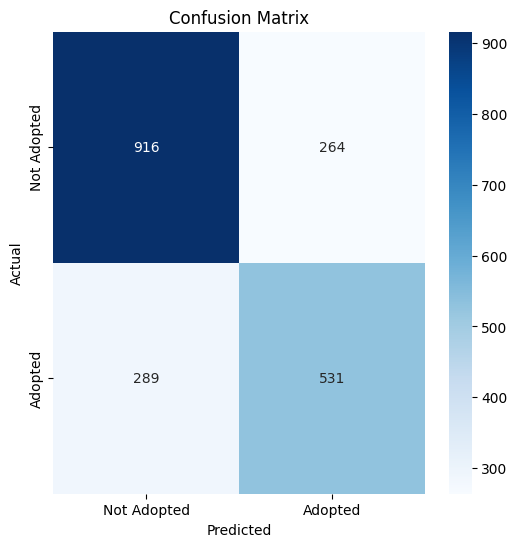

In [147]:
# Предсказание
y_pred_shelter_best = forest_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_best_forest = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_custom_best_forest = f1_score(y_test_shelter, y_pred_shelter_best)
recall_custom_best_forest = recall_score(y_test_shelter, y_pred_shelter_best)
precision_custom_best_forest = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_custom_best_forest:.2f}")
print(f"F1 Score: {f1_custom_best_forest:.2f}")
print(f"Recall: {recall_custom_best_forest:.2f}")
print(f"Precision: {precision_custom_best_forest:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter_best)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [148]:
# Предсказание
y_pred_house_best = forest_reg.predict(X_test_house)

# Метрики качества
mae_custom_best_forest = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_custom_best_forest = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_custom_best_forest = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_custom_best_forest}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_best_forest}")
print(f"R-squared (R^2): {r2_custom_best_forest}")

Mean Absolute Error (MAE): 146040.42096628656
Root Mean Squared Error (RMSE): 250307.3325990575
R-squared (R^2): 0.5775092736345948


### i. Сравнение результатов первоначального бейзлайна с улучшенным

Классификация

In [149]:
print(f"Разница в accuracy: {accuracy_custom_best_forest - accuracy_best_forest}")
print(f"Разница в F1 Score: {f1_custom_best_forest - f1_best_forest}")

Разница в accuracy: -0.03949999999999998
Разница в F1 Score: -0.04127127745366865


Регрессия

In [150]:
print(f"Разница в MAE: {mae_custom_best_forest - mae_best_forest}")
print(f"Разница в RMSE: {rmse_custom_best_forest - rmse_best_forest}")
print(f"Разница в R^2: {r2_custom_best_forest - r2_best_forest}")

Разница в MAE: 20878.366952591197
Разница в RMSE: 56568.26632017526
Разница в R^2: -0.1693835604620033


### j. Выводы

Точность имплементированной модели с улучшениями для задачи классификации оказалась хуже встроенной модели. Возможно, в данном случае были подобраны не лучшие гиперпараметры

Ошибки в имплементированной модели с улучшениями увеличились, R^2 стал лучше, чем без улучшений, но всё равно хуже встроенной модели

# Лабораторная работа 5, Лохматов Никита Игоревич М8О-406Б-21

## 1. Выбор начальных условий в ЛР 1

## 2. Создание бейзлайна и оценка качества

### a. Обучение модели из sklearn для классификации и оценка качества моделей по выбранным метрикам

Импортируем библиотеки

In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

Сделаем предобработку данных

In [152]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

Обучение модели

In [153]:
# Инициализация и обучение модели градиентного бустинга
gradient_clf = GradientBoostingClassifier()
gradient_clf.fit(X_train_shelter, y_train_shelter)

GradientBoostingClassifier()

Оценка качества модели

Accuracy: 0.76
F1 Score: 0.66
Recall: 0.57
Precision: 0.78


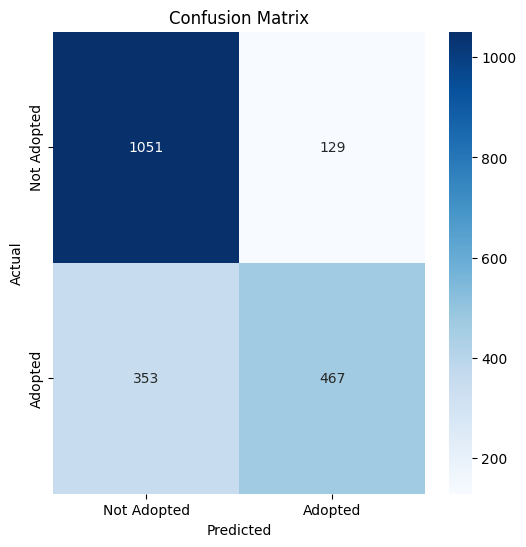

In [154]:
# Предсказание
y_pred_shelter = gradient_clf.predict(X_test_shelter)

# Метрики качества
accuracy_gradient = accuracy_score(y_test_shelter, y_pred_shelter)
f1_gradient = f1_score(y_test_shelter, y_pred_shelter)
recall_gradient = recall_score(y_test_shelter, y_pred_shelter)
precision_gradient = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_gradient:.2f}")
print(f"F1 Score: {f1_gradient:.2f}")
print(f"Recall: {recall_gradient:.2f}")
print(f"Precision: {precision_gradient:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### b. Обучение модели из sklearn для регрессии и оценка качества моделей по выбранным метрикам

Сделаем предобработку данных

In [155]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

Обучение модели

In [156]:
# Инициализация и обучение модели градиентного бустинга
gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(X_train_house, y_train_house)

GradientBoostingRegressor()

Оценка качества модели

In [157]:
# Предсказание
y_pred_house = gradient_reg.predict(X_test_house)

# Метрики качества
mae_gradient = mean_absolute_error(y_test_house, y_pred_house)
rmse_gradient = root_mean_squared_error(y_test_house, y_pred_house)
r2_gradient = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_gradient:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gradient:.2f}")
print(f"R^2 Score: {r2_gradient:.2f}")

Mean Absolute Error (MAE): 125246.45
Root Mean Squared Error (RMSE): 195061.07
R^2 Score: 0.74


## 3. Улучшение бейзлайна

### a. Гипотезы сформулированы в ЛР 1

### b.1 Проверка гипотез для задачи классификации

1. Масштабирование данных

In [158]:
# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели случайного леса
gradient_clf = GradientBoostingClassifier()
gradient_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_scaled = gradient_clf.predict(X_test_shelter_scaled)

accuracy_scaled = accuracy_score(y_test_shelter, y_pred_shelter_scaled)
f1_scaled = f1_score(y_test_shelter, y_pred_shelter_scaled)
recall_scaled = recall_score(y_test_shelter, y_pred_shelter_scaled)
precision_scaled = precision_score(y_test_shelter, y_pred_shelter_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_scaled - accuracy_gradient:.2f}")
print(f"Разница в F1 Score: {f1_scaled - f1_gradient:.2f}")

Гипотеза 1: масштабирование
Accuracy: 0.76
F1 Score: 0.65
Recall: 0.56
Precision: 0.79

Сравнение с бейзлайном:
Разница в Accuracy: -0.00
Разница в F1 Score: -0.01


2. Формирование новых признаков

In [159]:
# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)
X_shelter = X_shelter.fillna(X_shelter.mean())

# Обновляем обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Обучение модели случайного леса
gradient_clf = GradientBoostingClassifier()
gradient_clf.fit(X_train_shelter_scaled, y_train_shelter)

# Предсказание и метрики
y_pred_shelter_new_feature = gradient_clf.predict(X_test_shelter_scaled)

accuracy_new_feature = accuracy_score(y_test_shelter, y_pred_shelter_new_feature)
f1_new_feature = f1_score(y_test_shelter, y_pred_shelter_new_feature)
recall_new_feature = recall_score(y_test_shelter, y_pred_shelter_new_feature)
precision_new_feature = precision_score(y_test_shelter, y_pred_shelter_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Accuracy: {accuracy_new_feature:.2f}")
print(f"F1 Score: {f1_new_feature:.2f}")
print(f"Recall: {recall_new_feature:.2f}")
print(f"Precision: {precision_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_new_feature - accuracy_gradient:.2f}")
print(f"Разница в F1 Score: {f1_new_feature - f1_gradient:.2f}")

Гипотеза 2: добавление нового признака
Accuracy: 0.77
F1 Score: 0.71
Recall: 0.68
Precision: 0.74

Сравнение с бейзлайном:
Разница в Accuracy: 0.01
Разница в F1 Score: 0.05


3. Подбор гиперпараметров

In [160]:
# Масштабирование данных
scaler_shelter = MinMaxScaler()
X_train_shelter_scaled = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter_scaled = scaler_shelter.transform(X_test_shelter)

# Определяем сетку гиперпараметров

# Слишком долго ждать, тестировал по одному:
# {'n_estimators': 200}
# {'learning_rate': 0.1}
# {'max_depth': 5}

param_grid = {
    # 'n_estimators': [100, 150, 200],
    # 'learning_rate': [0.1, 0.2],
    'max_depth': [5, 10],
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_shelter_scaled, y_train_shelter)

# Лучшие параметры и их оценка
best_gradient_clf = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_best = best_gradient_clf.predict(X_test_shelter_scaled)

accuracy_best = accuracy_score(y_test_shelter, y_pred_best)
f1_best = f1_score(y_test_shelter, y_pred_best)
recall_best = recall_score(y_test_shelter, y_pred_best)
precision_best = precision_score(y_test_shelter, y_pred_best)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в Accuracy: {accuracy_best - accuracy_gradient:.2f}")
print(f"Разница в F1 Score: {f1_best - f1_gradient:.2f}")

Лучшие параметры: {'max_depth': 5}
Лучшая кросс-валидация: 0.78

Гипотеза 3: подбор гиперпараметров
Accuracy: 0.77
F1 Score: 0.71
Recall: 0.68
Precision: 0.74

Сравнение с бейзлайном:
Разница в Accuracy: 0.01
Разница в F1 Score: 0.05


### b.2 Проверка гипотез для задачи регрессии

1. Масштабирование данных

In [161]:
# Масштабирование данных
scaler_house = MinMaxScaler()
X_train_house_scaled = scaler_house.fit_transform(X_train_house)
X_test_house_scaled = scaler_house.transform(X_test_house)

# Обучение модели случайного леса
gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_scaled = gradient_reg.predict(X_test_house_scaled)
mae_scaled = mean_absolute_error(y_test_house, y_pred_house_scaled)
rmse_scaled = root_mean_squared_error(y_test_house, y_pred_house_scaled)
r2_scaled = r2_score(y_test_house, y_pred_house_scaled)

# Вывод результатов
print("Гипотеза 1: масштабирование")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.2f}")
print(f"R-squared (R^2): {r2_scaled:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_scaled - mae_gradient:.2f}")
print(f"Разница в RMSE: {rmse_scaled - rmse_gradient:.2f}")
print(f"Разница в R^2: {r2_scaled - r2_gradient:.2f}")

Гипотеза 1: масштабирование
Mean Absolute Error (MAE): 125463.56
Root Mean Squared Error (RMSE): 196936.09
R-squared (R^2): 0.74

Сравнение с бейзлайном:
Разница в MAE: 217.10
Разница в RMSE: 1875.02
Разница в R^2: -0.00


2. Формирование новых признаков

In [162]:
# Создание нового признака: общая площадь дома
X_house['total_area'] = X_house['sqft_living'] + X_house['sqft_basement']

# Обновляем данные
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Обучение модели случайного леса
gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(X_train_house_scaled, y_train_house)

# Предсказание и метрики
y_pred_house_new_feature = gradient_reg.predict(X_test_house_scaled)
mae_new_feature = mean_absolute_error(y_test_house, y_pred_house_new_feature)
rmse_new_feature = root_mean_squared_error(y_test_house, y_pred_house_new_feature)
r2_new_feature = r2_score(y_test_house, y_pred_house_new_feature)

# Вывод результатов
print("Гипотеза 2: добавление нового признака")
print(f"Mean Absolute Error (MAE): {mae_new_feature:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_new_feature:.2f}")
print(f"R-squared (R^2): {r2_new_feature:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_new_feature - mae_gradient:.2f}")
print(f"Разница в RMSE: {rmse_new_feature - rmse_gradient:.2f}")
print(f"Разница в R^2: {r2_new_feature - r2_gradient:.2f}")

Гипотеза 2: добавление нового признака
Mean Absolute Error (MAE): 124906.64
Root Mean Squared Error (RMSE): 193396.93
R-squared (R^2): 0.75

Сравнение с бейзлайном:
Разница в MAE: -339.81
Разница в RMSE: -1664.14
Разница в R^2: 0.00


3. Подбор гиперпараметров

In [163]:
# Масштабирование данных
scaler = MinMaxScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_test_house_scaled = scaler.transform(X_test_house)

# Определяем сетку гиперпараметров
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [5, 10],
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train_house_scaled, y_train_house)

# Лучшие параметры и их оценка
best_gradient_reg = grid_search.best_estimator_
best_score = -grid_search.best_score_  # Инвертируем, так как использовался отрицательный MAE

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация (MAE): {best_score:.2f}")
print()

# Предсказание с лучшими параметрами
y_pred_house_gs = best_gradient_reg.predict(X_test_house_scaled)
mae_gs = mean_absolute_error(y_test_house, y_pred_house_gs)
rmse_gs = root_mean_squared_error(y_test_house, y_pred_house_gs)
r2_gs = r2_score(y_test_house, y_pred_house_gs)

# Вывод результатов
print("Гипотеза 3: подбор гиперпараметров")
print(f"Mean Absolute Error (MAE): {mae_gs:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gs:.2f}")
print(f"R-squared (R^2): {r2_gs:.2f}")
print("\nСравнение с бейзлайном:")
print(f"Разница в MAE: {mae_gs - mae_gradient:.2f}")
print(f"Разница в RMSE: {rmse_gs - rmse_gradient:.2f}")
print(f"Разница в R^2: {r2_gs - r2_gradient:.2f}")

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Лучшая кросс-валидация (MAE): -0.69

Гипотеза 3: подбор гиперпараметров
Mean Absolute Error (MAE): 123666.57
Root Mean Squared Error (RMSE): 191298.04
R-squared (R^2): 0.75

Сравнение с бейзлайном:
Разница в MAE: -1579.88
Разница в RMSE: -3763.03
Разница в R^2: 0.01


### c. Формирование улучшенного бейзлайна

В улучшенном бейзлайне для классификации добавим масштабирование, параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200 }, а также новый признак: AgeInDays и IsDog


В улучшенном бейзлайне для регрессии добавим масштабирование, параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Классификация

In [164]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = MinMaxScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

gradient_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42)

Регрессия

In [165]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

gradient_reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)

d. Обучение модели с улучшенным бейзлайном 

Классификация

In [166]:
gradient_clf.fit(X_train_shelter, y_train_shelter)

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

Регрессия

In [167]:
gradient_reg.fit(X_train_house, y_train_house)

GradientBoostingRegressor(max_depth=5, random_state=42)

e. Оценка качества моделей с улучшенным бейзлайном 

Классификация

In [168]:
# Предсказание
y_pred_shelter_best = gradient_clf.predict(X_test_shelter)

# Метрики качества
accuracy_best_gradient = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_best_gradient = f1_score(y_test_shelter, y_pred_shelter_best)
recall_best_gradient = recall_score(y_test_shelter, y_pred_shelter_best)
precision_best_gradient = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_best_gradient:.2f}")
print(f"F1 Score: {f1_best_gradient:.2f}")
print(f"Recall: {recall_best_gradient:.2f}")
print(f"Precision: {precision_best_gradient:.2f}")

Accuracy: 0.77
F1 Score: 0.71
Recall: 0.68
Precision: 0.74


Регрессия

In [169]:
# Предсказание
y_pred_house_best = gradient_reg.predict(X_test_house)

# Метрики качества
mae_best_gradient = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_best_gradient = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_best_gradient = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_best_gradient}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_gradient}")
print(f"R-squared (R^2): {r2_best_gradient}")

Mean Absolute Error (MAE): 125143.4468118789
Root Mean Squared Error (RMSE): 197023.59300145047
R-squared (R^2): 0.7382380568955619


### f. Сравнение результатов первоначального бейзлайна с улучшенным бейзлайном

Классификация

In [170]:
print(f"Разница в accuracy: {accuracy_best_gradient - accuracy_gradient}")
print(f"Разница в F1 Score: {f1_best_gradient - f1_gradient}")

Разница в accuracy: 0.009499999999999953
Разница в F1 Score: 0.04717192101129586


Регрессия

In [171]:
print(f"Разница в MAE: {mae_best_gradient - mae_gradient}")
print(f"Разница в RMSE: {rmse_best_gradient - rmse_gradient}")
print(f"Разница в R^2: {r2_best_gradient - r2_gradient}")

Разница в MAE: -103.00588495316333
Разница в RMSE: 1962.5243605960277
Разница в R^2: -0.005188776275522278


### g. Выводы

**Вывод по классификации:**

Улучшения повысили точность и F1

**Вывод по регрессии:**

Улучшения понизили MAE, но повысили RMSE, а также незначительно понизили R^2

**Общие выводы:**:

1. Масштабирование улучшает точность, так как делает все признаки равнозначными
2. Оптимальная настройка гиперпараметров, таких как количество соседей, повышает качество модели, если сравнивать с настройками по умолчанию

## 4. Имплементация алгоритма машинного обучения 

### a. Самостоятельная имплементация алгоритмов машинного обучения для классификации и регрессии

Имплементация градиентного бустинга для классификации

In [172]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor


class GradientBoostingClassifierCustom:
    def __init__(self, learning_rate=0.1, max_depth=3, n_estimators=100):
        """
        Инициализация классификатора градиентного бустинга.
        
        :param learning_rate: скорость обучения (шаг бустинга).
        :param max_depth: максимальная глубина базовых деревьев.
        :param n_estimators: количество базовых моделей.
        """
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.trees = []
        self.classes_ = None

    def fit(self, X, y):
        """
        Обучение классификатора.
        
        :param X: обучающие признаки (матрица NxM).
        :param y: обучающие метки классов (вектор длины N).
        """
        self.classes_ = np.unique(y)
        y_encoded = np.zeros((len(y), len(self.classes_)))

        # One-hot encoding меток классов
        for idx, cls in enumerate(self.classes_):
            y_encoded[:, idx] = (y == cls).astype(int)

        # Построение базовых моделей для каждого класса
        self.trees = [[] for _ in range(len(self.classes_))]
        predictions = np.zeros_like(y_encoded, dtype=float)

        for _ in range(self.n_estimators):
            for cls_idx in range(len(self.classes_)):
                residual = y_encoded[:, cls_idx] - predictions[:, cls_idx]
                tree = DecisionTreeRegressor(max_depth=self.max_depth)
                tree.fit(X, residual)
                update = self.learning_rate * tree.predict(X)

                self.trees[cls_idx].append(tree)
                predictions[:, cls_idx] += update

    def predict(self, X):
        """
        Предсказание меток классов.
        
        :param X: тестовые признаки (матрица LxM).
        :return: предсказанные метки классов.
        """
        predictions = np.zeros((X.shape[0], len(self.classes_)))

        for cls_idx in range(len(self.classes_)):
            for tree in self.trees[cls_idx]:
                predictions[:, cls_idx] += self.learning_rate * tree.predict(X)

        return self.classes_[np.argmax(predictions, axis=1)]

Имплементация градиентного бустинга для регрессии

In [173]:
class GradientBoostingRegressorCustom:
    def __init__(self, learning_rate=0.1, max_depth=3, n_estimators=100):
        """
        Инициализация регрессора градиентного бустинга.
        
        :param learning_rate: скорость обучения (шаг бустинга).
        :param max_depth: максимальная глубина базовых деревьев.
        :param n_estimators: количество базовых моделей.
        """
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.trees = []
        self.initial_prediction = 0

    def fit(self, X, y):
        """
        Обучение регрессора.
        
        :param X: обучающие признаки (матрица NxM).
        :param y: обучающие целевые значения (вектор длины N).
        """
        self.initial_prediction = np.mean(y)
        predictions = np.full_like(y, self.initial_prediction, dtype=float)

        for _ in range(self.n_estimators):
            residual = y - predictions
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            update = self.learning_rate * tree.predict(X)

            self.trees.append(tree)
            predictions += update

    def predict(self, X):
        """
        Предсказание целевых значений.
        
        :param X: тестовые признаки (матрица LxM).
        :return: предсказанные целевые значения.
        """
        predictions = np.full(X.shape[0], self.initial_prediction, dtype=float)

        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)

        return predictions

### b. Обучение имплементированной модели

Классификация

In [174]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

gradient_clf = GradientBoostingClassifierCustom()
gradient_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [175]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

gradient_reg = GradientBoostingRegressorCustom()
gradient_reg.fit(X_train_house, y_train_house)

### c. Оценка качества имплементированных моделей

Классификация

Accuracy: 0.76
F1 Score: 0.64
Recall: 0.54
Precision: 0.80


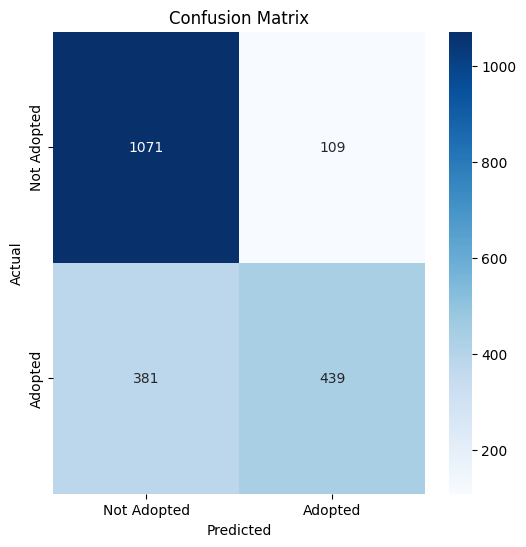

In [176]:
# Предсказание
y_pred_shelter = gradient_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_gradient = accuracy_score(y_test_shelter, y_pred_shelter)
f1_custom_gradient = f1_score(y_test_shelter, y_pred_shelter)
recall_custom_gradient = recall_score(y_test_shelter, y_pred_shelter)
precision_custom_gradient = precision_score(y_test_shelter, y_pred_shelter)

print(f"Accuracy: {accuracy_custom_gradient:.2f}")
print(f"F1 Score: {f1_custom_gradient:.2f}")
print(f"Recall: {recall_custom_gradient:.2f}")
print(f"Precision: {precision_custom_gradient:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [177]:
# Предсказание
y_pred_house = gradient_reg.predict(X_test_house)

# Метрики качества
mae_custom_gradient = mean_absolute_error(y_test_house, y_pred_house)
rmse_custom_gradient = root_mean_squared_error(y_test_house, y_pred_house)
r2_custom_gradient = r2_score(y_test_house, y_pred_house)

print(f"Mean Absolute Error (MAE): {mae_custom_gradient}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_gradient}")
print(f"R-squared (R^2): {r2_custom_gradient}")

Mean Absolute Error (MAE): 125250.4159223674
Root Mean Squared Error (RMSE): 194972.5218067079
R-squared (R^2): 0.7436597200847856


### d. Сравнение результатов первоначального бейзлайна и имплементированных моделей

Классификация

In [178]:
print(f"Разница в accuracy: {accuracy_custom_gradient - accuracy_gradient}")
print(f"Разница в F1 Score: {f1_custom_gradient - f1_gradient}")

Разница в accuracy: -0.0040000000000000036
Разница в F1 Score: -0.017791654276935187


Регрессия

In [179]:
print(f"Разница в MAE: {mae_custom_gradient - mae_gradient}")
print(f"Разница в RMSE: {rmse_custom_gradient - rmse_gradient}")
print(f"Разница в R^2: {r2_custom_gradient - r2_gradient}")

Разница в MAE: 3.9632255353499204
Разница в RMSE: -88.54683414654573
Разница в R^2: 0.00023288691370149106


### e. Выводы

Точность имплементированной модели для задачи классификации оказалась незначительно хуже, чем для встроенной модели

В случае с линейной регрессией, MAE уменьшилась, RMSE увеличилась, а R^2 стал немного ниже

### f. Добавление техник из улучшенного бейзлайна

Классификация

In [180]:
# Загрузка данных
shelter_data = pd.read_csv(dataset_shelter)

# Создаём целевую переменную для бинарной классификации: "произойдёт ли усыновление"
shelter_data['IsAdopted'] = shelter_data['OutcomeType'].apply(lambda x: 1 if x == 'Adoption' else 0)

# Удаляем ненужные столбцы
X_shelter = shelter_data.drop(columns=['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'IsAdopted'])
y_shelter = shelter_data['IsAdopted']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X_shelter = pd.DataFrame(imputer.fit_transform(X_shelter), columns=X_shelter.columns)

# Создание нового признака: возраст животного в днях
def age_in_days(age_str):
    if isinstance(age_str, str):
        num, unit = age_str.split()
        num = int(num)
        if 'year' in unit:
            return num * 365
        elif 'month' in unit:
            return num * 30
        elif 'week' in unit:
            return num * 7
        elif 'day' in unit:
            return num
    return 0

X_shelter['AgeInDays'] = shelter_data['AgeuponOutcome'].apply(age_in_days)

# Бинарное кодирование типа животного
X_shelter['IsDog'] = (shelter_data['AnimalType'] == 'Dog').astype(int)

# Кодируем категориальные признаки
X_shelter = pd.get_dummies(X_shelter, drop_first=True)

# Разделение на обучающую и тестовую выборки
X_train_shelter, X_test_shelter, y_train_shelter, y_test_shelter = train_test_split(
    X_shelter, y_shelter, test_size=0.2, random_state=42
)

# Масштабирование
scaler_shelter = MinMaxScaler()
X_train_shelter = scaler_shelter.fit_transform(X_train_shelter)
X_test_shelter = scaler_shelter.transform(X_test_shelter)

gradient_clf = GradientBoostingClassifierCustom(learning_rate=0.1, max_depth=5, n_estimators=200)

Регрессия

In [181]:
# Загрузка данных
house_data = pd.read_csv(dataset_house)

# Удаляем строки с пропущенными значениями в целевой переменной
house_data = house_data.dropna(subset=['price'])

# Выбираем дополнительные признаки
selected_features = [
    'sqft_living', 'bedrooms', 'bathrooms', 'floors', 
    'sqft_lot', 'waterfront', 'view', 'condition', 
    'grade', 'sqft_above', 'sqft_basement', 'yr_built'
]

# Выбираем признаки и целевую переменную
X_house = house_data[selected_features]  # Признаки
y_house = house_data['price']  # Целевая переменная

# Обработка пропущенных значений для X_house (если есть)
imputer = SimpleImputer(strategy='mean')
X_house = pd.DataFrame(imputer.fit_transform(X_house), columns=X_house.columns)

# Нормализация числовых признаков (важно для KNN)
scaler = MinMaxScaler()
X_house_scaled = pd.DataFrame(scaler.fit_transform(X_house), columns=X_house.columns)

# Делим на обучающую и тестовую выборки
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_scaled, y_house, test_size=0.2, random_state=42
)

# Масштабирование данных
scaler = MinMaxScaler()
X_train_house = scaler.fit_transform(X_train_house)
X_test_house = scaler.transform(X_test_house)

gradient_reg = GradientBoostingRegressorCustom(learning_rate=0.1, max_depth=5, n_estimators=100)

### g. Обучение на улучшенном бейзлайне

Классификация

In [182]:
gradient_clf.fit(X_train_shelter, y_train_shelter)

Регрессия

In [183]:
gradient_reg.fit(X_train_house, y_train_house)

### h. Оценка качества моделей на улучшенном бейзлайне

Классификация

Accuracy: 0.77
F1 Score: 0.71
Recall: 0.68
Precision: 0.74


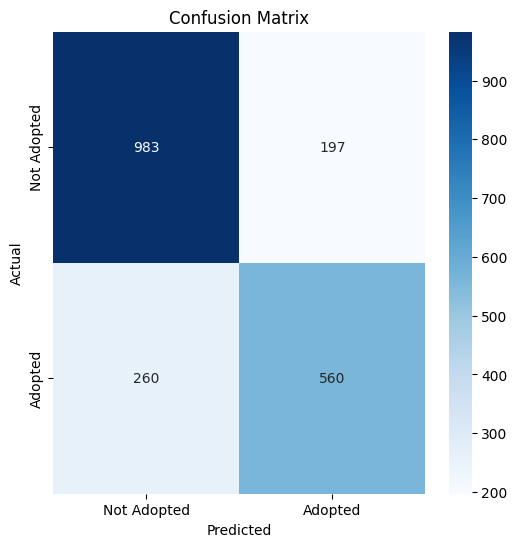

In [184]:
# Предсказание
y_pred_shelter_best = gradient_clf.predict(X_test_shelter)

# Метрики качества
accuracy_custom_best_gradient = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_custom_best_gradient = f1_score(y_test_shelter, y_pred_shelter_best)
recall_custom_best_gradient = recall_score(y_test_shelter, y_pred_shelter_best)
precision_custom_best_gradient = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_custom_best_gradient:.2f}")
print(f"F1 Score: {f1_custom_best_gradient:.2f}")
print(f"Recall: {recall_custom_best_gradient:.2f}")
print(f"Precision: {precision_custom_best_gradient:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter_best)

# Визуализация Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Регрессия

In [185]:
# Предсказание
y_pred_house_best = gradient_reg.predict(X_test_house)

# Метрики качества
mae_custom_best_gradient = mean_absolute_error(y_test_house, y_pred_house_best)
rmse_custom_best_gradient = root_mean_squared_error(y_test_house, y_pred_house_best)
r2_custom_best_gradient = r2_score(y_test_house, y_pred_house_best)

print(f"Mean Absolute Error (MAE): {mae_custom_best_gradient}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_best_gradient}")
print(f"R-squared (R^2): {r2_custom_best_gradient}")

Mean Absolute Error (MAE): 125040.79183224609
Root Mean Squared Error (RMSE): 195862.94684798334
R-squared (R^2): 0.7413129995650749


### i. Сравнение результатов первоначального бейзлайна с улучшенным

Классификация

In [186]:
print(f"Разница в accuracy: {accuracy_custom_best_gradient - accuracy_best_gradient}")
print(f"Разница в F1 Score: {f1_custom_best_gradient - f1_best_gradient}")

Разница в accuracy: 0.0030000000000000027
Разница в F1 Score: 0.0034328172996643813


Регрессия

In [187]:
print(f"Разница в MAE: {mae_custom_best_gradient - mae_best_gradient}")
print(f"Разница в RMSE: {rmse_custom_best_gradient - rmse_best_gradient}")
print(f"Разница в R^2: {r2_custom_best_gradient - r2_best_gradient}")

Разница в MAE: -102.65497963280359
Разница в RMSE: -1160.6461534671253
Разница в R^2: 0.0030749426695130255


### j. Выводы

Точность имплементированной модели с улучшениями для задачи классификации оказалась лучше встроенной модели

В имплементированной модели с улучшениями MAE незначительно уменьшилась, RMSE уменьшилась, R^2 увеличился

# Подведение итогов 

## Сравнение результатов ЛР 1-5

In [200]:
from tabulate import tabulate


table_data = [
    ["KNN", "Классификация", 
     f"accuracy = {accuracy_knn:.4f}, f1 = {f1_knn:.4f}, recall = {recall_knn:.4f}, precision = {precision_knn:.4f}", 
     f"accuracy = {accuracy_best_knn:.4f}, f1 = {f1_best_knn:.4f}, recall = {recall_best_knn:.4f}, precision = {precision_best_knn:.4f}", 
     f"accuracy = {accuracy_custom_knn:.4f}, f1 = {f1_custom_knn:.4f}, recall = {recall_custom_knn:.4f}, precision = {precision_custom_knn:.4f}", 
     f"accuracy = {accuracy_custom_best_knn:.4f}, f1 = {f1_custom_best_knn:.4f}, recall = {recall_custom_best_knn:.4f}, precision = {precision_custom_best_knn:.4f}"],
    
    ["", "Регрессия", 
     f"mae = {mae_knn:.4f}, rmse = {rmse_knn:.4f}, r2 = {r2_knn:.4f}", 
     f"mae = {mae_best_knn:.4f}, rmse = {rmse_best_knn:.4f}, r2 = {r2_best_knn:.4f}", 
     f"mae = {mae_custom_knn:.4f}, rmse = {rmse_custom_knn:.4f}, r2 = {r2_custom_knn:.4f}", 
     f"mae = {mae_custom_best_knn:.4f}, rmse = {rmse_custom_best_knn:.4f}, r2 = {r2_custom_best_knn:.4f}"],
    
    ["Линейные модели", "Классификация", 
     f"accuracy = {accuracy_log:.4f}, f1 = {f1_log:.4f}, recall = {recall_log:.4f}, precision = {precision_log:.4f}", 
     f"accuracy = {accuracy_best_log:.4f}, f1 = {f1_best_log:.4f}, recall = {recall_best_log:.4f}, precision = {precision_best_log:.4f}", 
     f"accuracy = {accuracy_custom_log:.4f}, f1 = {f1_custom_log:.4f}, recall = {recall_custom_log:.4f}, precision = {precision_custom_log:.4f}", 
     f"accuracy = {accuracy_custom_best_log:.4f}, f1 = {f1_custom_best_log:.4f}, recall = {recall_custom_best_log:.4f}, precision = {precision_custom_best_log:.4f}"],
    
    ["", "Регрессия", 
     f"mae = {mae_lin:.4f}, rmse = {rmse_lin:.4f}, r2 = {r2_lin:.4f}", 
     f"mae = {mae_best_lin:.4f}, rmse = {rmse_best_lin:.4f}, r2 = {r2_best_lin:.4f}", 
     f"mae = {mae_custom_lin:.4f}, rmse = {rmse_custom_lin:.4f}, r2 = {r2_custom_lin:.4f}", 
     f"mae = {mae_custom_best_lin:.4f}, rmse = {rmse_custom_best_lin:.4f}, r2 = {r2_custom_best_lin:.4f}"],
    
    ["Решающее дерево", "Классификация", 
     f"accuracy = {accuracy_tree:.4f}, f1 = {f1_tree:.4f}, recall = {recall_tree:.4f}, precision = {precision_tree:.4f}", 
     f"accuracy = {accuracy_best_tree:.4f}, f1 = {f1_best_tree:.4f}, recall = {recall_best_tree:.4f}, precision = {precision_best_tree:.4f}", 
     f"accuracy = {accuracy_custom_tree:.4f}, f1 = {f1_custom_tree:.4f}, recall = {recall_custom_tree:.4f}, precision = {precision_custom_tree:.4f}", 
     f"accuracy = {accuracy_custom_best_tree:.4f}, f1 = {f1_custom_best_tree:.4f}, recall = {recall_custom_best_tree:.4f}, precision = {precision_custom_best_tree:.4f}"],
    
    ["", "Регрессия", 
     f"mae = {mae_tree:.4f}, rmse = {rmse_tree:.4f}, r2 = {r2_tree:.4f}", 
     f"mae = {mae_best_tree:.4f}, rmse = {rmse_best_tree:.4f}, r2 = {r2_best_tree:.4f}", 
     f"mae = {mae_custom_tree:.4f}, rmse = {rmse_custom_tree:.4f}, r2 = {r2_custom_tree:.4f}", 
     f"mae = {mae_custom_best_tree:.4f}, rmse = {rmse_custom_best_tree:.4f}, r2 = {r2_custom_best_tree:.4f}"],
    
    ["Случайный лес", "Классификация", 
     f"accuracy = {accuracy_forest:.4f}, f1 = {f1_forest:.4f}, recall = {recall_forest:.4f}, precision = {precision_forest:.4f}", 
     f"accuracy = {accuracy_best_forest:.4f}, f1 = {f1_best_forest:.4f}, recall = {recall_best_forest:.4f}, precision = {precision_best_forest:.4f}", 
     f"accuracy = {accuracy_custom_forest:.4f}, f1 = {f1_custom_forest:.4f}, recall = {recall_custom_forest:.4f}, precision = {precision_custom_forest:.4f}", 
     f"accuracy = {accuracy_custom_best_forest:.4f}, f1 = {f1_custom_best_forest:.4f}, recall = {recall_custom_best_forest:.4f}, precision = {precision_custom_best_forest:.4f}"],
    
    ["", "Регрессия", 
     f"mae = {mae_forest:.4f}, rmse = {rmse_forest:.4f}, r2 = {r2_forest:.4f}", 
     f"mae = {mae_best_forest:.4f}, rmse = {rmse_best_forest:.4f}, r2 = {r2_best_forest:.4f}", 
     f"mae = {mae_custom_forest:.4f}, rmse = {rmse_custom_forest:.4f}, r2 = {r2_custom_forest:.4f}", 
     f"mae = {mae_custom_best_forest:.4f}, rmse = {rmse_custom_best_forest:.4f}, r2 = {r2_custom_best_forest:.4f}"],
    
    ["Градиентный бустинг", "Классификация", 
     f"accuracy = {accuracy_gradient:.4f}, f1 = {f1_gradient:.4f}, recall = {recall_gradient:.4f}, precision = {precision_gradient:.4f}", 
     f"accuracy = {accuracy_best_gradient:.4f}, f1 = {f1_best_gradient:.4f}, recall = {recall_best_gradient:.4f}, precision = {precision_best_gradient:.4f}", 
     f"accuracy = {accuracy_custom_gradient:.4f}, f1 = {f1_custom_gradient:.4f}, recall = {recall_custom_gradient:.4f}, precision = {precision_custom_gradient:.4f}", 
     f"accuracy = {accuracy_custom_best_gradient:.4f}, f1 = {f1_custom_best_gradient:.4f}, recall = {recall_custom_best_gradient:.4f}, precision = {precision_custom_best_gradient:.4f}"],
    
    ["", "Регрессия", 
     f"mae = {mae_gradient:.4f}, rmse = {rmse_gradient:.4f}, r2 = {r2_gradient:.4f}", 
     f"mae = {mae_best_gradient:.4f}, rmse = {rmse_best_gradient:.4f}, r2 = {r2_best_gradient:.4f}", 
     f"mae = {mae_custom_gradient:.4f}, rmse = {rmse_custom_gradient:.4f}, r2 = {r2_custom_gradient:.4f}", 
     f"mae = {mae_custom_best_gradient:.4f}, rmse = {rmse_custom_best_gradient:.4f}, r2 = {r2_custom_best_gradient:.4f}"]
]

headers = [
    "Алгоритм", 
    "Задача", 
    "Бейзлайн", 
    "Улучшенный бейзлайн", 
    "Самостоятельная имплементация алгоритма", 
    "Улучшенная имплементация алгоритма"
]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------+---------------+---------------------------------------------------------------------+---------------------------------------------------------------------+---------------------------------------------------------------------+---------------------------------------------------------------------+
| Алгоритм            | Задача        | Бейзлайн                                                            | Улучшенный бейзлайн                                                 | Самостоятельная имплементация алгоритма                             | Улучшенная имплементация алгоритма                                  |
+=====================+===============+=====================================================================+=====================================================================+=====================================================================+=====================================================================+
| KNN                 | Классификация | 

| Алгоритм              | Задача          | Бейзлайн                                                                 | Улучшенный бейзлайн                                                   | Самостоятельная имплементация                                       | Улучшенная самостоятельная имплементация                            |
|------------------------|-----------------|-------------------------------------------------------------------------|----------------------------------------------------------------------|----------------------------------------------------------------------|----------------------------------------------------------------------|
| **KNN**               | Классификация  | accuracy: 0.7180 <br> f1: 0.6582 <br> recall: 0.6622 <br> precision: 0.6542 | accuracy: 0.6770 <br> f1: 0.5193 <br> recall: 0.4256 <br> precision: 0.6660 | accuracy: 0.7320 <br> f1: 0.6736 <br> recall: 0.6744 <br> precision: 0.6727 | accuracy: 0.6795 <br> f1: 0.6016 <br> recall: 0.5902 <br> precision: 0.6134 |
|                        | Регрессия      | mae: 165296.01 <br> rmse: 273167.61 <br> r²: 0.4968                     | mae: 145297.89 <br> rmse: 230201.78 <br> r²: 0.6427                   | mae: 143717.60 <br> rmse: 228580.44 <br> r²: 0.6477                   | mae: 145279.43 <br> rmse: 230197.34 <br> r²: 0.6427                   |
| **Линейные модели**    | Классификация  | accuracy: 0.7625 <br> f1: 0.6953 <br> recall: 0.6610 <br> precision: 0.7334 | accuracy: 0.7338 <br> f1: 0.6635 <br> recall: 0.6422 <br> precision: 0.6863 | accuracy: 0.7060 <br> f1: 0.4674 <br> recall: 0.3146 <br> precision: 0.9085 | accuracy: 0.7570 <br> f1: 0.6920 <br> recall: 0.6659 <br> precision: 0.7203 |
|                        | Регрессия      | mae: 142010.83 <br> rmse: 226649.05 <br> r²: 0.6536                     | mae: 141519.59 <br> rmse: 226630.27 <br> r²: 0.6537                   | mae: 141883.26 <br> rmse: 226499.03 <br> r²: 0.6541                   | mae: 141884.33 <br> rmse: 226502.94 <br> r²: 0.6540                   |
| **Решающее дерево**    | Классификация  | accuracy: 0.7305 <br> f1: 0.6707 <br> recall: 0.6695 <br> precision: 0.6720 | accuracy: 0.7500 <br> f1: 0.6484 <br> recall: 0.5622 <br> precision: 0.7658 | accuracy: 0.7100 <br> f1: 0.4775 <br> recall: 0.3232 <br> precision: 0.9138 | accuracy: 0.7500 <br> f1: 0.6474 <br> recall: 0.5598 <br> precision: 0.7676 |
|                        | Регрессия      | mae: 165621.36 <br> rmse: 270434.98 <br> r²: 0.5068                     | mae: 144253.57 <br> rmse: 224019.85 <br> r²: 0.6616                   | mae: 221864.00 <br> rmse: 362256.06 <br> r²: 0.1151                   | mae: 221864.00 <br> rmse: 362256.06 <br> r²: 0.1151                   |
| **Случайный лес**      | Классификация  | accuracy: 0.7525 <br> f1: 0.6904 <br> recall: 0.6732 <br> precision: 0.7086 | accuracy: 0.7630 <br> f1: 0.6989 <br> recall: 0.6707 <br> precision: 0.7294 | accuracy: 0.7240 <br> f1: 0.6546 <br> recall: 0.6378 <br> precision: 0.6722 | accuracy: 0.7235 <br> f1: 0.6576 <br> recall: 0.6476 <br> precision: 0.6679 |
|                        | Регрессия      | mae: 125980.82 <br> rmse: 197415.05 <br> r²: 0.7372                     | mae: 125162.05 <br> rmse: 193739.07 <br> r²: 0.7469                   | mae: 171256.58 <br> rmse: 280589.84 <br> r²: 0.4691                   | mae: 146040.42 <br> rmse: 250307.33 <br> r²: 0.5775                   |
| **Градиентный бустинг**| Классификация  | accuracy: 0.7590 <br> f1: 0.6596 <br> recall: 0.5695 <br> precision: 0.7836 | accuracy: 0.7685 <br> f1: 0.7068 <br> recall: 0.6805 <br> precision: 0.7352 | accuracy: 0.7550 <br> f1: 0.6418 <br> recall: 0.5354 <br> precision: 0.8011 | accuracy: 0.7715 <br> f1: 0.7102 <br> recall: 0.6829 <br> precision: 0.7398 |
|                        | Регрессия      | mae: 125246.45 <br> rmse: 195061.07 <br> r²: 0.7434                     | mae: 125143.45 <br> rmse: 197023.59 <br> r²: 0.7382                   | mae: 125250.42 <br> rmse: 194972.52 <br> r²: 0.7437                   | mae: 125040.79 <br> rmse: 195862.95 <br> r²: 0.7413                   |

## Выводы

### 1. Классификация

- Лучшие результаты достигаются с использованием градиентного бустинга. Его улучшенная имплементация достигает максимальных значений метрик accuracy (0.7715) и f1 (0.7102).
- KNN показал сильные результаты для бейзлайна и собственной имплементации (accuracy: 0.7320, f1: 0.6736). Однако улучшения дали меньший прирост.
- Линейные модели показали высокий уровень precision (0.9085) для самостоятельной имплементации, но с низкими значениями recall.
- Решающее дерево имело заметное улучшение после добавления дополнительных улучшений (f1 от 0.4775 до 0.6474).

### 2. Регрессия

- Случайный лес демонстрирует наилучшие результаты с точки зрения метрик (mae: 125162.05, rmse: 193739.07, r²: 0.7469).
- Градиентный бустинг показал почти идентичные результаты случайному лесу. Его улучшенная версия дала r² = 0.7413.
- Решающее дерево имеет наихудшие показатели (r²: 0.1151), что требует дополнительных улучшений в настройке гиперпараметров.
- Самая высокая точность (r²: 0.6541) у линейных моделей была достигнута при использовании бейзлайна и самостоятельной имплементации.

### 3. Влияние улучшений

- Улучшенные версии алгоритмов в большинстве случаев показали прирост метрик. Однако в ряде случаев (например, KNN для классификации) результаты оказались хуже базового уровня.
- Улучшения значимо отразились на деревьях решений, особенно для задач классификации.

### 4. Замечания по имплементациям

- Собственные имплементации показали сильные результаты для базовых версий моделей, особенно KNN и линейных моделей.
- Для алгоритмов градиентного бустинга необходимо уделить внимание оптимизации гиперпараметров для дальнейшего повышения точности.

### 5. Подбор гиперпараметров

Может показаться, что сетка гиперпараметров довольно маленькая. Однако замечу, что при их подборе я тестировал разные вариации и отбрасывал те, где базовые параметры являются оптимальными, либо те, которые точно не являются оптимальными. Это делалось для уменьшения времени работы кода